# Load OCCs data

In [1]:
import pandas as pd
import numpy as np

In [ ]:
OCCs = pd.read_csv(
    "D:\\Postgraduate\\Data Science Project\\OCCS.txt",
    sep=",",  
    header=0, 
    encoding='latin1',  
    on_bad_lines='skip'  
)

In [13]:
OCCs[OCCs['County'] == '-']

,Year,County,Sex,Occupation_String,Occode,HISCO,Count
6734777,1901,-,F,-,-1,-1,3
6734778,1901,-,F,1ST DRESSER TO H R H THE DUCHESS OF C & Y,35,14140,1
6734779,1901,-,F,1ST STEWARDESS,159,52030,4
6734780,1901,-,F,2ND DRESSER TO H R H THE DUCHESS OF C & Y,35,14140,1
6734781,1901,-,F,3ND DRESSER TO H R H THE DUCHESS OF C & Y,35,14140,1
...,...,...,...,...,...,...,...
6736300,1901,-,U,SUB LIEUTENANT,22,58420,3
6736301,1901,-,U,SUITE ATTENDANT,109,54090,1
6736302,1901,-,U,SURGEON,42,6100,4
6736303,1901,-,U,TINDAL,24,58430,1


In [ ]:
# Get all years
years = OCCs['Year'].unique()

# save to csv files by year
for year in years:
    # use 'Year' filtered data
    year_data = OCCs[OCCs['Year'] == year]
    
    filename = f'OCCs_{year}.csv'
    
    # save as csv files
    year_data.to_csv(filename, index=False, encoding='utf-8')
    

In [25]:
OCCs_1851 = OCCs[OCCs['Year'] ==1851]
OCCs_1861 = OCCs[OCCs['Year'] ==1861]
OCCs_1881 = OCCs[OCCs['Year'] ==1881]
OCCs_1891 = OCCs[OCCs['Year'] ==1891]
OCCs_1901 = OCCs[OCCs['Year'] ==1901]
OCCs_1911 = OCCs[OCCs['Year'] ==1911]

## Split data set by Year

In [42]:
counties_1851 = set(OCCs_1851['County'].unique())
counties_1861 = set(OCCs_1861['County'].unique())
counties_1881 = set(OCCs_1881['County'].unique())
counties_1891 = set(OCCs_1891['County'].unique())
counties_1901 = set(OCCs_1901['County'].unique())
counties_1911 = set(OCCs_1911['County'].unique())

# county only in 1861 based on 1851 data
only_in_1861 = counties_1861 - counties_1851
print("\nCounty only in 1861:", only_in_1861)

# county only in 1881
only_in_1881 = counties_1881 - (counties_1851)
print("\nCounty only in 1881:", only_in_1881)

# county only in 1891
only_in_1891 = counties_1891 - (counties_1851)
print("\nCounty only in 1891:", only_in_1891)

# county only in 1901
only_in_1901 = counties_1901 - (counties_1851)
print("\nCounty only in 1901:", only_in_1901)

# county only in 1911
only_in_1911 = counties_1911 - (counties_1851)
print("\nCounty only in 1911:", only_in_1911)



County only in 1861: {'BRITISH SHIPS IN HOME PORTS', 'SHIPPING', 'ROYAL NAVY AT SEA AND IN POR'}

County only in 1881: {'Flintshire', 'Huntingdonshire', 'Gloucestershire', 'Nottinghamshire', 'Merionethshire', 'Cornwall', 'Durham', 'Suffolk', 'Bedfordshire', 'Montgomeryshire', 'Worcestershire', 'Cheshire', 'Essex', 'Buckinghamshire', 'Westmorland', 'Lancashire', 'Sussex', 'Berkshire', 'Pembrokeshire', 'Devon', 'Hertfordshire', 'Cumberland', 'Yorkshire West Riding', 'Norfolk', 'Denbighshire', 'Oxfordshire', 'Monmouthshire', 'Shropshire', 'Herefordshire', 'Middlesex (Extra London)', 'Northamptonshire', 'Lincolnshire', 'Rutland', 'Yorkshire East Riding (With ', 'Carmarthenshire', 'Carnarvonshire', 'Wiltshire', 'Glamorganshire', 'Warwickshire', 'Brecknockshire', 'Surrey (Extra London)', 'Cardiganshire', 'Anglesey', 'Derbyshire', 'Yorkshire North Riding', 'Dorset', 'Hampshire', 'Kent (Extra London)', 'Leicestershire', 'Northumberland', 'Cambridgeshire', 'Somerset', 'Radnorshire', 'Staffords

# Load 1851 data as example

In [10]:
import pandas as pd
import numpy as np
import re

OCCs_1851 = pd.read_csv(
    "D:\\Postgraduate\\Data Science Project\\Data\\OCCs_1851.csv",
    sep=",",  
    header=0, 
    encoding='latin1',  
    on_bad_lines='skip'  
)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text.strip()
OCCs_1851['Occupation_String'] = OCCs_1851['Occupation_String'].astype(str)
OCCs_1851['Occupation_String'] = OCCs_1851['Occupation_String'].apply(clean_text)

OCCs_1851 = OCCs_1851.dropna(subset=['Occupation_String'])

OCCs_1851 = OCCs_1851[OCCs_1851['Occupation_String'].str.strip() != '']

import pandas as pd
import numpy as np

Occ_HISCO = pd.read_excel("D:\\Postgraduate\\Data Science Project\\Data\\OCCODE_HISCO (FINAL)_ZZ.xlsx",header=0)

mapping_df = Occ_HISCO.rename(columns={
    "OCCODE": "Occode",
    "OCCUPATION": "Occode_Desc",
    "HISCO_TEXT": "HISCO_Desc"
})

# only keep necessary columns
mapping_df = mapping_df[["Occode", "HISCO", "Occode_Desc", "HISCO_Desc"]]

# use Occode only to merge
OCCs_1851_text = OCCs_1851.merge(mapping_df, on=["Occode"], how="left")

OCCs_1851_text['Sex'] = OCCs_1851_text['Sex'].replace({
    'F': 'Female',
    'M': 'Male',
    'U': 'Unknown'
})

In [4]:
OCCs_1851_text_anglesey = OCCs_1851_text[OCCs_1851_text['County'] == 'ANGLESEY']

## Rule-based data pre-cleaning

In [ ]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from rapidfuzz import fuzz, process
from tqdm import tqdm
from collections import defaultdict, Counter
import re
import string
from typing import Dict, List, Tuple, Set
import difflib
import os
import gc
import math

# English dictionary validation setup
try:
    import nltk
    from nltk.corpus import wordnet, words
    from nltk.stem import WordNetLemmatizer
    
    # Download required NLTK data
    for resource in ['wordnet', 'words', 'averaged_perceptron_tagger']:
        try:
            nltk.data.find(f'corpora/{resource}' if resource != 'averaged_perceptron_tagger' else f'taggers/{resource}')
        except LookupError:
            nltk.download(resource, quiet=True)
    
    NLTK_AVAILABLE = True
    print("NLTK resources loaded successfully")
except ImportError:
    print("NLTK not available. Using basic dictionary validation.")
    NLTK_AVAILABLE = False

# Basic English words as fallback
BASIC_ENGLISH_WORDS = {
    'worker', 'man', 'woman', 'boy', 'girl', 'master', 'apprentice', 'journeyman',
    'labourer', 'laborer', 'servant', 'farmer', 'baker', 'smith', 'carpenter', 
    'weaver', 'tailor', 'shoemaker', 'blacksmith', 'agricultural', 'domestic',
    'general', 'coal', 'iron', 'cotton', 'wool', 'silk', 'wife', 'widow', 
    'daughter', 'son', 'mother', 'father', 'sister', 'brother', 'retired',
    'unemployed', 'former', 'late', 'head', 'assistant', 'clerk', 'teacher',
    'nurse', 'doctor', 'merchant', 'shopkeeper', 'miner', 'miller', 'butcher',
    'grocer', 'publican', 'innkeeper', 'coachman', 'groom', 'gardener'
}

class TraditionalOccupationCleaner:
    def __init__(self, excel_file_path: str = None):
        """
        Initialize the traditional occupation cleaner
        Args:
            excel_file_path: Path to Excel file containing dictionaries
        """
        self.embedding_model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
        
        # Initialize English dictionary validation
        self._initialize_english_dictionary_validation()
        
        # NEW: Initialize multi-occupation detection patterns
        self._initialize_multi_occupation_patterns()
        
        # Load dictionaries from Excel file or use empty defaults
        if excel_file_path and os.path.exists(excel_file_path):
            self.abbreviation_dict, self.common_misspellings, self.occupation_categories, self.important_modifiers = self.load_dictionaries_from_excel(excel_file_path)
        else:
            # Empty dictionaries if no file provided
            self.abbreviation_dict = {}
            self.common_misspellings = {}
            self.important_modifiers = {}
            self.occupation_categories = {
                'agricultural': [],
                'domestic_service': [],
                'textile_manufacture': [],
                'clothing_footwear': [],
                'mining_quarrying': [],
                'building_construction': [],
                'metalwork_engineering': [],
                'food_drink': [],
                'transport_communication': [],
                'professional_clerical': [],
                'retail_trade': [],
                'manufacturing_other': [],
                'crafts_trades': [],
                'personal_service': [],
                'public_service': [],
                'general_labour': [],
                'other': []
            }
    
    def _initialize_multi_occupation_patterns(self):
        """
        Initialize patterns for detecting multiple occupations
        """
        # Common separators and connectors in historical records
        self.occupation_separators = [
            r'\s+and\s+',           # " and "
            r'\s*&\s*',             # " & " or "&"
            r'\s*\+\s*',            # " + " or "+"
            r'\s*/\s*',             # " / " or "/"
            r'\s*,\s*and\s+',       # ", and "
            r'\s+also\s+',          # " also "
            r'\s+or\s+',            # " or "
        ]
        
        # Compile regex patterns for efficiency
        self.separator_patterns = [re.compile(pattern, re.IGNORECASE) for pattern in self.occupation_separators]
        
        # Words that should NOT be considered as separate occupations
        self.non_occupation_words = {
            'wife', 'widow', 'daughter', 'son', 'mother', 'father', 'sister', 'brother',
            'unmarried', 'spinster', 'bachelor', 'widower', 'married',
            'unemployed', 'retired', 'former', 'late', 'ex',
            'apprentice', 'master', 'journeyman', 'assistant', 'head',
            'the', 'a', 'an', 'of', 'in', 'at', 'to', 'for', 'with', 'by'
        }
    
    def _detect_multiple_occupations(self, text: str) -> bool:
        """
        Simple detection of multiple occupations - returns True/False only
        """
        if pd.isna(text) or not text.strip():
            return False
        
        normalized_text = self.normalize_text(text)
        
        # Check for obvious multi-occupation patterns
        for pattern in self.separator_patterns:
            if pattern.search(normalized_text):
                # Split by this pattern
                parts = pattern.split(normalized_text)
                # Clean up parts
                occupations = [part.strip() for part in parts if part.strip()]
                
                # Only consider it multiple if get 2+ meaningful parts
                if len(occupations) >= 2:
                    # Check that each part is substantial and looks like an occupation
                    substantial_parts = []
                    for part in occupations:
                        # Skip very short parts, common words, and modifier words
                        if (len(part) > 2 and 
                            part not in self.non_occupation_words and
                            len(part.split()) >= 1):  # At least one word
                            substantial_parts.append(part)
                    
                    # If we have 2+ substantial parts that look like occupations, it's multiple
                    if len(substantial_parts) >= 2:
                        return True
        
        # Special case: Check for comma-separated occupations (more conservative)
        # Only if the parts look like actual occupations and don't contain family/modifier words
        if ',' in normalized_text and 'and' not in normalized_text:
            parts = [part.strip() for part in normalized_text.split(',')]
            if len(parts) >= 2:
                # Check if each part looks like an occupation (not a modifier)
                occupation_like_parts = []
                for part in parts:
                    # Skip if it's likely a modifier (family relation, etc.)
                    if (len(part) > 3 and 
                        not any(modifier in part for modifier in self.non_occupation_words) and
                        not part in self.non_occupation_words):
                        occupation_like_parts.append(part)
                
                if len(occupation_like_parts) >= 2:
                    return True
        
        return False
    
    def _initialize_english_dictionary_validation(self):
        """
        Initialize English dictionary validation tools
        """
        self.lemmatizer = None
        self.english_words_set = set()
        
        if NLTK_AVAILABLE:
            try:
                self.lemmatizer = WordNetLemmatizer()
                english_words = set(words.words())
                self.english_words_set = {word.lower() for word in english_words}
                print(f"Loaded {len(self.english_words_set)} English words from NLTK")
            except Exception as e:
                print(f"Error loading NLTK resources: {e}")
                self.english_words_set = BASIC_ENGLISH_WORDS.copy()
        else:
            self.english_words_set = BASIC_ENGLISH_WORDS.copy()
        
        # Add historical occupation terms
        historical_terms = {
            'labourer', 'laborer', 'ag', 'lab', 'serv', 'dom', 'agric', 'gen',
            'blacksmith', 'whitesmith', 'tinsmith', 'goldsmith', 'silversmith',
            'wheelwright', 'millwright', 'shipwright', 'cordwainer', 'ostler',
            'victualler', 'chandler', 'draper', 'mercer', 'haberdasher',
            'maltster', 'brewer', 'distiller', 'tanner', 'currier', 'fellmonger'
        }
        self.english_words_set.update(historical_terms)

    def _is_valid_english_word(self, word: str) -> bool:
        """
        Check if a single word is a valid English word
        """
        if not word or len(word) < 2:
            return False
        
        word_lower = word.lower()
        
        # 1. Direct dictionary lookup
        if word_lower in self.english_words_set:
            return True
        
        # 2. NLTK wordnet check if available
        if NLTK_AVAILABLE and self.lemmatizer:
            try:
                # Check lemmatized form
                lemmatized = self.lemmatizer.lemmatize(word_lower)
                if lemmatized in self.english_words_set:
                    return True
                
                # Check wordnet synsets
                synsets = wordnet.synsets(word_lower)
                if synsets:
                    return True
            except:
                pass
        
        # 3. Check common occupation suffixes
        occupation_suffixes = ['er', 'or', 'ist', 'ian', 'man', 'woman', 'smith', 'wright', 'maker']
        for suffix in occupation_suffixes:
            if word_lower.endswith(suffix):
                root = word_lower[:-len(suffix)]
                if len(root) >= 3 and root in self.english_words_set:
                    return True
        
        # 4. Check plural forms
        if word_lower.endswith('s') and len(word_lower) > 3:
            singular = word_lower[:-1]
            if singular in self.english_words_set:
                return True
        
        return False

    def _validate_english_words(self, text: str) -> Dict[str, any]:
        """
        Validate English words in text for confidence calculation
        """
        if pd.isna(text) or not text.strip():
            return {
                'valid_words': [],
                'invalid_words': [],
                'validity_ratio': 0.0,
                'contains_invalid': True
            }
        
        normalized = self.normalize_text(text)
        words = normalized.split()
        
        if not words:
            return {
                'valid_words': [],
                'invalid_words': [],
                'validity_ratio': 0.0,
                'contains_invalid': True
            }
        
        valid_words = []
        invalid_words = []
        
        for word in words:
            if self._is_valid_english_word(word):
                valid_words.append(word)
            else:
                invalid_words.append(word)
        
        validity_ratio = len(valid_words) / len(words) if words else 0.0
        contains_invalid = len(invalid_words) > 0
        
        return {
            'valid_words': valid_words,
            'invalid_words': invalid_words,
            'validity_ratio': validity_ratio,
            'contains_invalid': contains_invalid
        }

    def load_dictionaries_from_excel(self, file_path: str) -> Tuple[Dict, Dict, Dict]:
        """
        Load occupation dictionaries from Excel file
        Expected sheets: 'abbreviations', 'misspellings', 'categories'
        """
        try:
            # Read Excel sheets
            abbreviations_df = pd.read_excel(file_path, sheet_name='abbreviations')
            misspellings_df = pd.read_excel(file_path, sheet_name='misspellings')
            categories_df = pd.read_excel(file_path, sheet_name='categories')
            modifiers_df = pd.read_excel(file_path, sheet_name='modifiers')
            # Convert to dictionaries
            abbreviation_dict = dict(zip(abbreviations_df['abbreviation'], abbreviations_df['full_form']))
            misspellings_dict = dict(zip(misspellings_df['misspelling'], misspellings_df['correction']))
            important_modifiers = {}
            all_modifiers_set = set()
            
            if 'modifier_word' in modifiers_df.columns and 'modifier_type' in modifiers_df.columns:
                # modifier_word, modifier_type
                for _, row in modifiers_df.iterrows():
                    word = row['modifier_word']
                    mod_type = row['modifier_type']
                    if mod_type not in important_modifiers:
                        important_modifiers[mod_type] = []
                    important_modifiers[mod_type].append(word)
                    all_modifiers_set.add(word)
            else:

                word_col = None
                type_col = None
                
                for col in modifiers_df.columns:
                    if 'modifier' in col.lower() and 'type' not in col.lower():
                        word_col = col
                    elif 'type' in col.lower():
                        type_col = col
                
                if word_col and type_col:
                    for _, row in modifiers_df.iterrows():
                        word = row[word_col]
                        mod_type = row[type_col]
                        if mod_type not in important_modifiers:
                            important_modifiers[mod_type] = []
                        important_modifiers[mod_type].append(word)
                        all_modifiers_set.add(word)
                else:
                    print("Warning: Could not find modifier columns, using defaults")
                    important_modifiers = self._get_default_modifiers()
                    all_modifiers_set = set()
                    for words in important_modifiers.values():
                        all_modifiers_set.update(words)
            
            self.all_modifiers_set = all_modifiers_set

            # Convert categories
            occupation_categories = {}
            for category in categories_df['category'].unique():
                occupations = categories_df[categories_df['category'] == category]['occupation'].tolist()
                occupation_categories[category] = occupations
            
            print(f"Loaded dictionaries from {file_path}")
            print(f"  - {len(abbreviation_dict)} abbreviations")
            print(f"  - {len(misspellings_dict)} misspellings")
            print(f"  - {len(occupation_categories)} categories")
            
            return abbreviation_dict, misspellings_dict, occupation_categories, important_modifiers
            
        except Exception as e:
            print(f"Error loading Excel file {file_path}: {e}")
            print("Using empty dictionaries")
            
            important_modifiers = self._get_default_modifiers()
            self.all_modifiers_set = set()
            for words in important_modifiers.values():
                self.all_modifiers_set.update(words)
            return {}, {}, {}, important_modifiers
        
    def _get_default_modifiers(self):
        return {
            'family_relation': ['wife', 'widow', 'daughter', 'son', 'mother', 'father', 'sister', 'brother'],
            'marital_status': ['unmarried', 'spinster', 'bachelor', 'widower', 'married'],
            'employment_status': ['unemployed', 'retired', 'former', 'late', 'ex'],
            'skill_level': ['apprentice', 'master', 'journeyman', 'assistant', 'head']
        }
    
    def normalize_text(self, text: str) -> str:
        """
        Normalize text by removing punctuation, extra spaces, and converting to lowercase
        """
        if pd.isna(text):
            return ""
        
        text = str(text).lower().strip()
        text = re.sub(r'[^\w\s\-&]', ' ', text)
        text = re.sub(r'\s+', ' ', text)
        text = text.strip()
        
        return text
    
    def expand_abbreviations(self, text: str) -> str:
        """
        Expand common abbreviations with word boundary detection
        """
        normalized_text = self.normalize_text(text)
        
        if not self.abbreviation_dict:
            return normalized_text
            
        if normalized_text in self.abbreviation_dict:
            return self.abbreviation_dict[normalized_text]
        
        sorted_abbrs = sorted(self.abbreviation_dict.items(), key=lambda x: len(x[0]), reverse=True)
        result_text = normalized_text
        
        for abbr, full_form in sorted_abbrs:
            pattern = r'\b' + re.escape(abbr) + r'\b'
            if re.search(pattern, result_text):
                result_text = re.sub(pattern, full_form, result_text)
        
        return result_text
    
    def correct_spelling(self, text: str) -> str:
        """
        FIXED: Correct common spelling errors with proper word boundary detection
        Now correctly handles "blacsmith wife" → "blacksmith wife"
        """
        if pd.isna(text):
            return ""
        
        normalized_text = self.normalize_text(text)
        
        if not self.common_misspellings:
            return normalized_text
            
        # Step 1: Check for exact match first (highest priority)
        if normalized_text in self.common_misspellings:
            return self.common_misspellings[normalized_text]
        
        result_text = normalized_text
        
        # Step 2: Apply word-level corrections
        # Sort by length (longest first) to prevent partial matches
        sorted_misspellings = sorted(self.common_misspellings.items(), key=lambda x: len(x[0]), reverse=True)
        
        for misspelling, correction in sorted_misspellings:
            # Skip if this is a multi-word entry (handled differently)
            if ' ' in misspelling:
                # For multi-word misspellings, use direct string replacement
                if misspelling in result_text:
                    result_text = result_text.replace(misspelling, correction)
            else:
                # For single-word misspellings, use word boundary matching
                pattern = r'\b' + re.escape(misspelling) + r'\b'
                if re.search(pattern, result_text, re.IGNORECASE):
                    result_text = re.sub(pattern, correction, result_text, flags=re.IGNORECASE)
        
        return result_text
    
    def fuzzy_match_occupations(self, text: str, threshold: int = 80) -> str:
        """
        Use fuzzy matching to find similar standard occupations
        """
        if not self.occupation_categories:
            return text
            
        all_standard_occupations = []
        for category, occupations in self.occupation_categories.items():
            all_standard_occupations.extend(occupations)
        
        if not all_standard_occupations:
            return text
            
        best_match = process.extractOne(
            text, 
            all_standard_occupations, 
            scorer=fuzz.ratio,
            score_cutoff=threshold
        )
        
        if best_match:
            return best_match[0]
        return text
    
    def get_occupation_category(self, occupation: str) -> str:
        """
        Determine the category of an occupation
        """
        if not self.occupation_categories:
            return 'other'
            
        occupation_lower = occupation.lower()
        
        for category, occupations in self.occupation_categories.items():
            for occ in occupations:
                if occ.lower() in occupation_lower or occupation_lower in occ.lower():
                    return category
        
        return 'other'
    
    def calculate_confidence(self, Occuption_String: str, standardized: str, is_abbreviation: bool, is_misspelled: bool) -> float:
        """
        ENHANCED: Multi-factor confidence estimation with English dictionary validation
        """
        if pd.isna(Occuption_String) or pd.isna(standardized):
            return 0.0
            
        original_clean = str(Occuption_String).lower().strip()
        standardized_clean = str(standardized).lower().strip()
        
        # Check if unchanged
        is_unchanged = original_clean == standardized_clean
        
        # English dictionary validation during confidence calculation
        original_validation = self._validate_english_words(original_clean)
        standardized_validation = self._validate_english_words(standardized_clean)
        
        # Calculate base confidence using original logic
        base_confidence = self._calculate_base_confidence_original_logic(
            original_clean, standardized_clean, is_abbreviation, is_misspelled
        )
        
        # Apply dictionary-based confidence adjustments
        final_confidence = self._apply_dictionary_confidence_adjustments(
            base_confidence, original_validation, standardized_validation, is_unchanged
        )
        
        return max(0.05, min(1.0, final_confidence))

    def _calculate_base_confidence_original_logic(self, original_clean: str, standardized_clean: str, 
                                                is_abbreviation: bool, is_misspelled: bool) -> float:
        """
        Calculate base confidence using original logic
        """
        # Perfect match gets high confidence (but not 1.0 anymore)
        if original_clean == standardized_clean:
            return 0.9  # Reduced from 1.0 to allow dictionary adjustment
        
        # Factor 1: Semantic similarity using multiple metrics
        token_similarity = fuzz.token_sort_ratio(original_clean, standardized_clean) / 100.0
        partial_similarity = fuzz.partial_ratio(original_clean, standardized_clean) / 100.0
        ratio_similarity = fuzz.ratio(original_clean, standardized_clean) / 100.0
        
        # Weighted combination of similarity metrics
        semantic_score = (0.4 * token_similarity + 0.3 * partial_similarity + 0.3 * ratio_similarity)
        
        # Factor 2: Length ratio penalty
        len_ratio = min(len(original_clean), len(standardized_clean)) / max(len(original_clean), len(standardized_clean))
        length_penalty = math.exp(1 - 1/len_ratio) if len_ratio > 0 else 0.0
        
        # Factor 3: Transformation type confidence weights
        transformation_confidence = 1.0
        
        if is_abbreviation:
            abbr_confidence = self._assess_abbreviation_quality(original_clean, standardized_clean)
            transformation_confidence *= abbr_confidence
        
        if is_misspelled:
            spell_confidence = self._assess_spelling_correction_quality(original_clean, standardized_clean)
            transformation_confidence *= spell_confidence
        
        # Factor 4: Character overlap coefficient
        char_set_original = set(original_clean.replace(' ', ''))
        char_set_standardized = set(standardized_clean.replace(' ', ''))
        char_overlap = len(char_set_original & char_set_standardized) / len(char_set_original | char_set_standardized) if char_set_original | char_set_standardized else 0
        
        # Factor 5: Word-level semantic preservation
        words_original = set(original_clean.split())
        words_standardized = set(standardized_clean.split())
        word_preservation = len(words_original & words_standardized) / len(words_original) if words_original else 0
        
        # Multi-factor confidence calculation using geometric mean
        factors = [semantic_score, length_penalty, transformation_confidence, char_overlap, word_preservation]
        non_zero_factors = [f for f in factors if f > 0]
        
        if not non_zero_factors:
            return 0.1
        
        confidence = math.pow(math.prod(non_zero_factors), 1.0/len(non_zero_factors))
        return confidence

    def _apply_dictionary_confidence_adjustments(self, base_confidence: float, original_validation: Dict, 
                                               standardized_validation: Dict, is_unchanged: bool) -> float:
        """
        Apply dictionary-based confidence adjustments
        """
        original_validity = original_validation['validity_ratio']
        standardized_validity = standardized_validation['validity_ratio']
        
        # Case 1: Unchanged with invalid words - Major confidence penalty
        if is_unchanged and original_validation['contains_invalid']:
            if original_validity < 0.5:
                return base_confidence * 0.3  # Strong penalty for many invalid words
            elif original_validity < 0.8:
                return base_confidence * 0.6  # Moderate penalty for some invalid words
            else:
                return base_confidence * 0.8  # Light penalty for few invalid words
        
        # Case 2: Unchanged with all valid words - Maintain confidence
        if is_unchanged and not original_validation['contains_invalid']:
            return base_confidence
        
        # Case 3: Modified - Check if modification improved validity
        if not is_unchanged:
            validity_improvement = standardized_validity - original_validity
            
            if validity_improvement > 0.3:
                return base_confidence * 1.1  # Bonus for significant improvement
            elif validity_improvement > 0:
                return base_confidence  # Neutral for moderate improvement
            elif standardized_validity < 0.7:
                return base_confidence * 0.7  # Penalty for poor result after modification
            else:
                return base_confidence * 0.9  # Small penalty for neutral modification
        
        return base_confidence
    
    def _assess_abbreviation_quality(self, original: str, standardized: str) -> float:
        """
        Assess the quality of abbreviation expansion
        High confidence for logical abbreviations, lower for poor matches
        """
        # Check if abbreviation follows common patterns
        original_words = original.split()
        standardized_words = standardized.split()
        
        # Pattern 1: Initials match (e.g., "ag lab" -> "agricultural labourer")
        if len(original_words) <= len(standardized_words):
            initial_match_score = 0.0
            for i, orig_word in enumerate(original_words):
                if i < len(standardized_words):
                    if standardized_words[i].startswith(orig_word[:3]):  # First 3 chars match
                        initial_match_score += 1.0
            initial_match_ratio = initial_match_score / len(original_words) if original_words else 0
            
            # High confidence if most words follow abbreviation pattern
            if initial_match_ratio >= 0.7:
                return 0.95  # Very high confidence for good abbreviations
            elif initial_match_ratio >= 0.5:
                return 0.85
            else:
                return 0.75
        
        # Default confidence for other abbreviation patterns
        return 0.8

    def _assess_spelling_correction_quality(self, original: str, standardized: str) -> float:
        """
        Assess the quality of spelling correction
        Based on edit distance and phonetic similarity
        """
        from rapidfuzz.distance import Levenshtein
        edit_distance = Levenshtein.distance(original, standardized)            
        max_len = max(len(original), len(standardized))
        
        if max_len == 0:
            return 0.5
        
        # Confidence decreases with edit distance
        edit_ratio = 1 - (edit_distance / max_len)
        
        # High confidence for minor spelling errors
        if edit_distance <= 2:
            return 0.9
        elif edit_distance <= 4:
            return 0.8
        else:
            return max(0.6, edit_ratio)
   
    def standardize_occupation(self, occupation_str: str) -> Dict:
        """
        ENHANCED: Standardize occupation string with multi-occupation detection
        """
        if pd.isna(occupation_str):
            return {
                'original': '',
                'standardized': '',
                'category': 'unknown',
                'confidence': 0.0,
                'needs_llm_check': True,
                'confidence_reason': 'empty_input',
                'invalid_words': [],
                'is_multiple_occupation': False  # NEW FIELD: Simple boolean flag
            }
        
        original = str(occupation_str).strip()
        
        # NEW: Check for multiple occupations (simple detection)
        is_multiple_occupation = self._detect_multiple_occupations(original)
        
        # PHASE 1: Preprocessing - Fix modifier variants and multi-word spellings
        # Step 1: Normalize the entire string
        normalized_full = self.normalize_text(original)
        
        # Step 2: First spelling correction - Handle modifier variants (daur→daughter)
        # This step will convert "black smith daur" → "black smith daughter"
        first_correction = self.correct_spelling(normalized_full)
        is_misspelled_phase1 = first_correction != normalized_full
        
        # PHASE 2: Modifier detection and base occupation processing  
        # Step 3: Detect modifiers on the corrected text
        modifiers, base_text = self.detect_modifiers(first_correction)
        
        # Step 4: Normalize base occupation text
        normalized_base = self.normalize_text(base_text)
        
        # Step 5: Expand abbreviations
        expanded = self.expand_abbreviations(normalized_base)
        is_abbreviation = expanded != normalized_base
        
        # Step 6: Second spelling correction - Handle base occupation spelling (black smith→blacksmith)
        corrected_base = self.correct_spelling(expanded)
        is_misspelled_phase2 = corrected_base != expanded
        
        # Combine spelling error detection from both phases
        is_misspelled = is_misspelled_phase1 or is_misspelled_phase2
        
        # Step 7: Fuzzy match to standard occupations
        matched_base = self.fuzzy_match_occupations(corrected_base, threshold=75)
        
        # Step 8: Recombine standardized result
        standardized = self.standardize_with_modifiers(original, modifiers, matched_base)
        
        # Step 9: Determine occupation category
        category = self.get_occupation_category_with_modifiers(standardized, modifiers)
        
        # Step 10: Calculate confidence score (includes dictionary validation)
        confidence = self.calculate_confidence(original, standardized, is_abbreviation, is_misspelled)

        # NEW: Adjust confidence if multiple occupation detected
        if is_multiple_occupation:
            confidence = confidence * 0.9  # Small penalty for multi-occupation complexity

        # Determine if LLM check is needed (considering multiple occupation)
        needs_llm_check, confidence_reason, invalid_words = self._determine_llm_check_need(
            original, standardized, confidence, is_abbreviation, is_misspelled, is_multiple_occupation
        )

        return {
            'original': original,
            'standardized': standardized,  
            'category': category,
            'confidence': confidence,
            'needs_llm_check': needs_llm_check,
            'confidence_reason': confidence_reason,
            'invalid_words': invalid_words,
            'is_multiple_occupation': is_multiple_occupation  # NEW FIELD: Simple boolean flag
        }
    
    def _determine_llm_check_need(self, original: str, standardized: str, confidence: float,
                                is_abbreviation: bool, is_misspelled: bool, is_multiple_occupation: bool = False) -> Tuple[bool, str, List[str]]:
        """
        ENHANCED: Determine if LLM check is needed (now considers multiple occupation)
        """
        original_clean = str(original).lower().strip()
        standardized_clean = str(standardized).lower().strip()
        is_unchanged = original_clean == standardized_clean
        
        # Validate original text for invalid words
        original_validation = self._validate_english_words(original_clean)
        
        # Priority 1: Multiple occupation - EXCLUDE from LLM check
        if is_multiple_occupation:
            return False, 'multiple_occupation_excluded_from_llm_check', original_validation['invalid_words']
        
        # Priority 2: Unchanged with invalid words (highest priority)
        if is_unchanged and original_validation['contains_invalid']:
            if original_validation['validity_ratio'] < 0.5:
                return True, 'unchanged_with_many_invalid_words', original_validation['invalid_words']
            elif original_validation['validity_ratio'] < 0.8:
                return True, 'unchanged_with_some_invalid_words', original_validation['invalid_words']
            else:
                return False, 'unchanged_with_few_invalid_words', original_validation['invalid_words']
        
        # Priority 3: Very low confidence regardless of change
        if confidence < 0.3:
            return True, 'very_low_confidence', original_validation['invalid_words']
        
        # Priority 4: Modified but still has quality issues
        if not is_unchanged:
            standardized_validation = self._validate_english_words(standardized_clean)
            if standardized_validation['validity_ratio'] < 0.7:
                return True, 'modification_poor_result', standardized_validation['invalid_words']
        
        # Priority 5: Low confidence
        if confidence < 0.5:
            return True, 'low_confidence', original_validation['invalid_words']
        
        # No LLM check needed
        return False, 'acceptable_quality', []
    
    def detect_modifiers(self, text: str) -> Tuple[List[str], str]:
        """
        Detect important modifier words in occupation text
        Returns: (list_of_modifiers, base_occupation_text)
        """
        if pd.isna(text):
            return [], ""
        
        normalized_text = self.normalize_text(text)
        words = normalized_text.split()
        
        detected_modifiers = []
        remaining_words = []
        
        modifier_set = getattr(self, 'all_modifiers_set', set())
        if not modifier_set and self.important_modifiers:
            for modifier_list in self.important_modifiers.values():
                if isinstance(modifier_list, list):
                    modifier_set.update(modifier_list)
        
        for word in words:
            if word in modifier_set:
                detected_modifiers.append(word)
            else:
                remaining_words.append(word)
        
        base_text = " ".join(remaining_words).strip()
        return detected_modifiers, base_text

    def standardize_with_modifiers(self, text: str, modifiers: List[str], base_occupation: str) -> str:
        """
        Standardize occupation while preserving important modifiers
        """
        if not base_occupation:
            return text
        
        standardized_base = self.fuzzy_match_occupations(base_occupation, threshold=75)
        
        if not modifiers:
            return standardized_base
        
        family_words = self.important_modifiers.get('family_relation', [])
        family_modifiers = [m for m in modifiers if m in family_words]
        
        if family_modifiers:
            if 'wife' in family_modifiers:
                return f"{standardized_base} wife"
            elif 'widow' in family_modifiers:
                return f"{standardized_base} widow" 
            elif 'daughter' in family_modifiers:
                return f"{standardized_base} daughter"
            elif 'son' in family_modifiers:
                return f"{standardized_base} son"
            else:
                return f"{standardized_base} {family_modifiers[0]}"
        
        skill_words = self.important_modifiers.get('skill_level', [])
        skill_modifiers = [m for m in modifiers if m in skill_words]
        if skill_modifiers:
            return f"{skill_modifiers[0]} {standardized_base}"
        
        employment_words = self.important_modifiers.get('employment_status', [])
        employment_modifiers = [m for m in modifiers if m in employment_words]
        if employment_modifiers:
            return f"{employment_modifiers[0]} {standardized_base}"
        
        if modifiers:
            return f"{' '.join(modifiers)} {standardized_base}".strip()
        
        return standardized_base

    def get_occupation_category_with_modifiers(self, occupation: str, modifiers: List[str]) -> str:
        """
        Determine category considering modifiers
        """
        if not modifiers:
            return self.get_occupation_category(occupation)
        
        # Check for family-related modifiers
        family_words = self.important_modifiers.get('family_relation', [])
        if any(m in family_words for m in modifiers):
            return 'family_dependent'
        
        # Check for unemployment
        employment_words = self.important_modifiers.get('employment_status', [])
        if any(m in employment_words for m in modifiers):
            return 'unemployed_seeking'
        
        # Otherwise use standard category detection
        return self.get_occupation_category(occupation)
    
    def batch_standardize_occupations(self, df: pd.DataFrame, chunk_size: int = 1000) -> Tuple[pd.DataFrame, pd.DataFrame]:
        """
        ENHANCED: Standardize all occupations with simple multi-occupation flagging
        """
        results = []
        unique_occupations = df["Occupation_String"].unique()
        
        print(f"Standardizing {len(unique_occupations)} unique occupations...")
        print("Multi-occupation detection enabled (simple flagging)")
        
        # Track multi-occupation statistics
        multi_occupation_count = 0
        
        for i in tqdm(range(0, len(unique_occupations), chunk_size), desc="Processing occupation chunks"):
            chunk_occupations = unique_occupations[i:i + chunk_size]
            chunk_results = []
            
            for occupation in chunk_occupations:
                result = self.standardize_occupation(occupation)
                
                # Track multi-occupation statistics
                if result.get('is_multiple_occupation', False):
                    multi_occupation_count += 1
                
                chunk_results.append(result)
            
            results.extend(chunk_results)
            gc.collect()
        
        standardization_df = pd.DataFrame(results)
        
        print("Merging results with original DataFrame by county...")
        df_chunks = []
        
        for county in tqdm(df['County'].unique(), desc="Processing counties"):
            county_df = df[df['County'] == county].copy()
            
            for i in range(0, len(county_df), chunk_size):
                chunk_df = county_df.iloc[i:i + chunk_size].copy()
                chunk_merged = chunk_df.merge(
                    standardization_df, 
                    left_on="Occupation_String", 
                    right_on="original", 
                    how="left"
                )
                df_chunks.append(chunk_merged)
        
        df_standardized = pd.concat(df_chunks, ignore_index=True)
        df_standardized = df_standardized.drop(columns=['original'])

        # Print comprehensive summary statistics
        total_records = len(df_standardized)
        llm_needed = df_standardized['needs_llm_check'].sum()
        llm_percentage = (llm_needed / total_records) * 100 if total_records > 0 else 0
        avg_confidence = df_standardized['confidence'].mean()
        
        # Multi-occupation statistics
        multi_occupation_records = df_standardized['is_multiple_occupation'].sum()
        multi_occupation_percentage = (multi_occupation_records / total_records) * 100 if total_records > 0 else 0
        
        print(f"\n=== ENHANCED PROCESSING SUMMARY ===")
        print(f"Total records processed: {total_records:,}")
        print(f"Records needing LLM check: {llm_needed:,} ({llm_percentage:.1f}%)")
        print(f"Average confidence score: {avg_confidence:.3f}")
        print(f"Multi-occupation records detected: {multi_occupation_records:,} ({multi_occupation_percentage:.1f}%)")
        
        # Show top reasons for LLM check
        if llm_needed > 0:
            print(f"\nTop reasons for LLM check:")
            reason_counts = df_standardized['confidence_reason'].value_counts()
            for reason, count in reason_counts.head(7).items():
                percentage = (count / total_records) * 100
                print(f"  {reason}: {count:,} ({percentage:.1f}%)")

        return df_standardized, standardization_df

def Occupation_cleaning_pipeline(df: pd.DataFrame, 
                                excel_file_path: str = None,
                                min_frequency: int = 2,
                                chunk_size: int = 1000):
    """
    Complete traditional cleaning pipeline with simple multi-occupation detection
    """
    cleaner = TraditionalOccupationCleaner(excel_file_path)
    
    print(f"Processing {len(df)} records in chunks of {chunk_size}...")
    print("Multi-occupation detection: Simple flagging enabled")
    
    # Standardize occupations
    print("Standardizing occupations...")
    df_standardized, standardization_results = cleaner.batch_standardize_occupations(df, chunk_size)

    return df_standardized   

def integrate_traditional_cleaning_with_export(df: pd.DataFrame, 
                                             excel_file_path: str = None,
                                             chunk_size: int = 1000,
                                             export_mapping: bool = True,
                                             output_dir: str = "."):
    """
    ENHANCED: Memory-efficient integration with simple multi-occupation detection and LLM flagging
    """
    n_records = len(df)
    n_unique_occupations = len(df["Occupation_String"].unique())
    
    print(f"Dataset: {n_records} records, {n_unique_occupations} unique occupations")
    print(f"Counties: {len(df['County'].unique())}")

    df_cleaned = Occupation_cleaning_pipeline(
        df, 
        excel_file_path,
        chunk_size=chunk_size
    ) 
    df_result = df_cleaned
    
    main_output = os.path.join(output_dir, "cleaned_occupations_with_categories.csv")
    df_result.to_csv(main_output, index=False)
    print(f"Exported main dataset to {main_output}")

    # Export LLM check subset
    llm_check_subset = df_result[df_result['needs_llm_check'] == True].copy()
    if len(llm_check_subset) > 0:
        # Sort by confidence (lowest first) for prioritized review
        llm_check_subset = llm_check_subset.sort_values('confidence')
        llm_output = os.path.join(output_dir, "llm_check_needed.csv")
        llm_check_subset.to_csv(llm_output, index=False)
        print(f"Exported LLM check subset to {llm_output} ({len(llm_check_subset):,} records)")

    # NEW: Export multi-occupation flagged records
    multi_occupation_subset = df_result[df_result['is_multiple_occupation'] == True].copy()
    if len(multi_occupation_subset) > 0:
        multi_output = os.path.join(output_dir, "multi_occupation_flagged.csv")
        multi_occupation_subset.to_csv(multi_output, index=False)
        print(f"Exported multi-occupation flagged records to {multi_output} ({len(multi_occupation_subset):,} records)")

    return df_result


# Usage example with simple multi-occupation detection
if __name__ == "__main__":
    # Load your data
    df = OCCs_1851_text
    
    # Ensure County column exists
    if 'County' not in df.columns:
        print("Warning: 'County' column not found. Adding default county...")
        df['County'] = 'Unknown'

    # Set parameters
    CHUNK_SIZE = 1000
    EXCEL_FILE_PATH = "occupation_dictionaries.xlsx"
    
    print(f"Loaded {len(df)} records from {len(df['County'].unique())} counties.")
    print(f"Processing in chunks of {CHUNK_SIZE} per county...")
    
    # Create output directory
    os.makedirs("./cleaning_results_1851", exist_ok=True)
    
    # Run enhanced cleaning pipeline with simple multi-occupation detection
    df_cleaned = integrate_traditional_cleaning_with_export(
        df, 
        excel_file_path=EXCEL_FILE_PATH,
        chunk_size=CHUNK_SIZE,
        export_mapping=True,
        output_dir="./cleaning_results_1851"
    )
    
    print(f"\nProcessing completed! Cleaned {len(df_cleaned)} records.")

NLTK resources loaded successfully
Loaded 1725688 records from 56 counties.
Processing in chunks of 1000 per county...
Dataset: 1725688 records, 747171 unique occupations
Counties: 56
Loaded 234377 English words from NLTK
Loaded dictionaries from occupation_dictionaries.xlsx
  - 235 abbreviations
  - 84 misspellings
  - 17 categories
Processing 1725688 records in chunks of 1000...
Multi-occupation detection: Simple flagging enabled
Standardizing occupations...
Standardizing 747171 unique occupations...
Multi-occupation detection enabled (simple flagging)


Processing occupation chunks: 100%|██████████| 748/748 [13:42<00:00,  1.10s/it]


Merging results with original DataFrame by county...


Processing counties: 100%|██████████| 56/56 [05:57<00:00,  6.38s/it]



=== ENHANCED PROCESSING SUMMARY ===
Total records processed: 1,725,688
Records needing LLM check: 325,135 (18.8%)
Average confidence score: 0.772
Multi-occupation records detected: 62,075 (3.6%)

Top reasons for LLM check:
  acceptable_quality: 1,317,075 (76.3%)
  unchanged_with_some_invalid_words: 188,825 (10.9%)
  modification_poor_result: 64,254 (3.7%)
  multiple_occupation_excluded_from_llm_check: 62,075 (3.6%)
  unchanged_with_many_invalid_words: 59,410 (3.4%)
  unchanged_with_few_invalid_words: 21,403 (1.2%)
  low_confidence: 12,475 (0.7%)
Exported main dataset to ./cleaning_results_1851\cleaned_occupations_with_categories.csv
Exported LLM check subset to ./cleaning_results_1851\llm_check_needed.csv (325,135 records)
Exported multi-occupation flagged records to ./cleaning_results_1851\multi_occupation_flagged.csv (62,075 records)

Processing completed! Cleaned 1725688 records.


## Single Process with LLM:Qwen

In [ ]:
import pandas as pd
import numpy as np
import requests
import json
import time
import re
import os
from typing import Dict, List, Optional, Tuple
from tqdm import tqdm
import logging
from concurrent.futures import ThreadPoolExecutor, as_completed
import threading
import string

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

class OptimizedSingleProcessor:
    """
    Optimized single record processor - accurate and efficient
    """
    
    def __init__(self, 
                 model_name: str = "llama2:7b",
                 ollama_url: str = "http://localhost:11434",
                 timeout: int = 45,
                 max_retries: int = 2,
                 delay_between_requests: float = 0.1,  # Very fast processing
                 max_workers: int = 6):                # More workers for single requests
        """
        Initialize optimized single processor
        """
        self.model_name = model_name
        self.ollama_url = ollama_url
        self.timeout = timeout
        self.max_retries = max_retries
        self.delay_between_requests = delay_between_requests
        self.max_workers = max_workers
        
        # Thread lock for statistics
        self.lock = threading.Lock()
        
        # Statistics
        self.stats = {
            "total_processed": 0,
            "corrections_made": 0,
            "api_errors": 0,
            "processing_time": 0,
            "average_response_time": 0,
            "unique_records_processed": 0,        # NEW: Track unique records
            "duplicate_records_saved": 0,         # NEW: Track duplicates saved
            "deduplication_ratio": 0.0            # NEW: Track deduplication efficiency
        }
        
        # Test connection
        self._test_connection()
        logger.info(f"🚀 Optimized single processor initialized")
        logger.info(f"⚡ Max workers: {max_workers}, Delay: {delay_between_requests}s")
    
    def _test_connection(self):
        """Test Ollama connection"""
        try:
            response = requests.get(f"{self.ollama_url}/api/tags", timeout=10)
            if response.status_code == 200:
                models = response.json().get("models", [])
                model_names = [m["name"] for m in models]
                logger.info(f"✅ Ollama connection successful! Available models: {model_names}")
                
                if self.model_name not in model_names:
                    logger.warning(f"⚠️  Model '{self.model_name}' not found. Please run: ollama pull {self.model_name}")
            else:
                logger.error(f"❌ Ollama connection failed: HTTP {response.status_code}")
        except Exception as e:
            logger.error(f"❌ Cannot connect to Ollama service: {e}")
    
    def create_optimized_single_prompt(self, original: str, rule_based_result: str, 
                                     confidence: float, county: str = "", sex: str = "", Occode_Desc: str = "") -> str:
        """
        Create optimized prompt for single record processing
        """
        
        # Add context if available
        context = ""
        if county and county != "Unknown":
            context += f" County: {county}."
        if sex and sex != "Unknown":
            context += f" Gender: {sex}."
        if Occode_Desc and Occode_Desc != "Unknown":
            context += f" Description for Original:{Occode_Desc}."
        
        prompt = f"""Fix the spelling and formatting of this British historical occupation. Keep the meaning exactly the same.

Original: "{original}"
Current: "{rule_based_result}"
Confidence: {confidence:.2f}{context}

Rules:
- ONLY fix spelling mistakes and formatting
- Keep family terms: wife, widow, daughter, son
- Keep core occupation unchanged (blacksmith stays blacksmith)
- If Original is good, keep it
- Do NOT change occupation meaning

Examples:
- "black smith" → "blacksmith" (fix spacing)
- "ag lab" → "agricultural labourer" (standard abbreviation)
- "black smith wife" → "blacksmith wife" (fix spacing, keep family term)

Output only the corrected occupation:"""
        
        return prompt
    
    def call_ollama_optimized(self, prompt: str) -> str:
        """
        Optimized Ollama API call for single records
        """
        for attempt in range(self.max_retries):
            try:
                response = requests.post(
                    f"{self.ollama_url}/api/generate",
                    json={
                        "model": self.model_name,
                        "prompt": prompt,
                        "stream": False,
                        "options": {
                            "temperature": 0.0,         # Zero randomness for consistency
                            "num_predict": 50,          # Short responses for single occupations
                            "top_k": 1,                 # Most deterministic
                            "top_p": 0.1,               # Very focused
                            "repeat_penalty": 1.0,     # No penalty needed
                            "stop": ["Original:", "Current:", "Rules:", "Examples:", "Output"]
                        }
                    },
                    timeout=self.timeout
                )
                response.raise_for_status()
                
                result = response.json()
                return result.get("response", "").strip()
                
            except requests.exceptions.Timeout:
                logger.warning(f"API timeout (attempt {attempt + 1}/{self.max_retries})")
                if attempt < self.max_retries - 1:
                    time.sleep(1)  # Short wait before retry
                else:
                    return ""
                    
            except Exception as e:
                logger.error(f"API request failed (attempt {attempt + 1}): {e}")
                if attempt < self.max_retries - 1:
                    time.sleep(0.5)
                else:
                    return ""
        
        return ""
    
    def parse_single_response_clean(self, response_text: str, original_result: str) -> str:
        """
        Clean parser for single record responses
        """
        if not response_text:
            return original_result
        
        # Clean the response
        cleaned = response_text.strip()
        
        # Remove common prefixes that LLM might add
        prefixes = [
            "Output:", "Result:", "Corrected:", "Answer:", "The corrected occupation is:",
            "Corrected occupation:", "Fixed:", "Final result:"
        ]
        
        for prefix in prefixes:
            if cleaned.lower().startswith(prefix.lower()):
                cleaned = cleaned[len(prefix):].strip()
                break
        
        # Remove quotes and punctuation
        cleaned = cleaned.strip('"\'.,!?')
        
        # Remove any trailing explanation
        # Split on common explanation starters
        explanation_starters = [" because", " since", " as", " (", " -", "\n"]
        for starter in explanation_starters:
            if starter in cleaned:
                cleaned = cleaned.split(starter)[0].strip()
        
        # Validate result
        if not cleaned or len(cleaned) > 100:
            return original_result
        
        # Check for error responses
        error_words = ['sorry', 'cannot', 'unclear', 'error', 'invalid', 'unsure', 'difficult']
        if any(word in cleaned.lower() for word in error_words):
            return original_result
        
        # Additional validation - check if result is reasonable
        if self._validate_single_result(cleaned, original_result):
            return cleaned
        else:
            return original_result
    
    def _validate_single_result(self, llm_result: str, original_result: str) -> bool:
        """
        Validate that LLM result is reasonable for single record
        """
        llm_lower = llm_result.lower()
        orig_lower = original_result.lower()
        
        # If same as original, it's valid
        if llm_lower == orig_lower:
            return True
        
        # Check length - shouldn't be too different
        if abs(len(llm_result) - len(original_result)) > 20:
            return False
        
        # Should contain similar key words
        llm_words = set(llm_lower.split())
        orig_words = set(orig_lower.split())
        
        # At least 50% word overlap for short occupations
        if len(orig_words) <= 3:
            overlap = len(llm_words & orig_words) / len(orig_words | llm_words)
            if overlap < 0.3:
                return False
        
        return True
    
    def process_single_record_optimized(self, record: Dict) -> Dict:
        """
        Process single record with optimization
        """
        start_time = time.time()
        
        try:
            # Create prompt
            prompt = self.create_optimized_single_prompt(
                record['original'],
                record['rule_based_result'],
                record['confidence'],
                record.get('county', ''),
                record.get('sex', ''),
                record.get('Occode_Desc', '')
            )
            
            # Call LLM
            llm_response = self.call_ollama_optimized(prompt)
            
            # Parse result
            final_result = self.parse_single_response_clean(llm_response, record['rule_based_result'])
            
            # Determine if correction was made
            is_corrected = final_result != record['rule_based_result']
            
            processing_time = time.time() - start_time
            
            # Update statistics
            with self.lock:
                self.stats["total_processed"] += 1
                if is_corrected:
                    self.stats["corrections_made"] += 1
                self.stats["processing_time"] += processing_time
                
                # Update average response time
                self.stats["average_response_time"] = self.stats["processing_time"] / self.stats["total_processed"]
            
            return {
                'Occupation_String': record['original'],
                'rule_based_result': record['rule_based_result'],
                'rule_based_confidence': record['confidence'],
                'county': record.get('county', 'Unknown'),
                'sex': record.get('sex', 'Unknown'),
                'Occode_Desc': record.get('Occode_Desc', 'Unknown'),
                'llm_corrected': final_result,
                'is_corrected': is_corrected,
                'final_result': final_result,
                'processing_time': processing_time,
                'llm_response_raw': llm_response[:100] if llm_response else ''
            }
            
        except Exception as e:
            logger.error(f"Error processing record: {e}")
            
            with self.lock:
                self.stats["api_errors"] += 1
            
            return {
                'Occupation_String': record['original'],
                'rule_based_result': record['rule_based_result'],
                'rule_based_confidence': record['confidence'],
                'county': record.get('county', 'Unknown'),
                'sex': record.get('sex', 'Unknown'),
                'Occode_Desc': record.get('Occode_Desc', 'Unknown'),
                'llm_corrected': record['rule_based_result'],
                'is_corrected': False,
                'final_result': record['rule_based_result'],
                'processing_time': 0,
                'llm_response_raw': f'Error: {str(e)}'
            }
    
    def save_checkpoint_single(self, df: pd.DataFrame, processed_count: int, checkpoint_file: str):
        """Save checkpoint for single processing"""
        checkpoint_data = {
            "processed_count": processed_count,
            "stats": self.stats,
            "timestamp": time.time(),
            "processing_mode": "single_record"
        }
        
        # Save progress info
        with open(checkpoint_file + '.json', 'w') as f:
            json.dump(checkpoint_data, f, indent=2)
        
        # Save current data
        df.to_csv(checkpoint_file + '.csv', index=False)
        
        logger.info(f"💾 Checkpoint saved: {processed_count:,} records processed")
    
    def load_checkpoint_single(self, checkpoint_file: str) -> Tuple[Optional[pd.DataFrame], int]:
        """Load checkpoint for single processing"""
        json_file = checkpoint_file + '.json'
        csv_file = checkpoint_file + '.csv'
        
        if os.path.exists(json_file) and os.path.exists(csv_file):
            # Load progress info
            with open(json_file, 'r') as f:
                checkpoint_data = json.load(f)
            
            # Load data
            df = pd.read_csv(csv_file)
            
            self.stats = checkpoint_data.get("stats", self.stats)
            processed_count = checkpoint_data.get("processed_count", 0)
            
            logger.info(f"🔄 Resumed from checkpoint: {processed_count:,} records processed")
            return df, processed_count
        
        return None, 0
    
    def create_unique_records_map(self, df: pd.DataFrame, confidence_threshold: float) -> Tuple[pd.DataFrame, Dict[str, str]]:
        """
        NEW METHOD: Create unique records for processing and mapping back to original
        """
        # Filter records that need processing
        mask = df['confidence'] < confidence_threshold
        to_process_df = df[mask].copy()
        
        if len(to_process_df) == 0:
            logger.info("✅ No records need processing")
            return pd.DataFrame(), {}
        
        logger.info(f"📊 Records below confidence threshold: {len(to_process_df):,}")
        
        # Group by Occupation_String to find duplicates
        occupation_groups = to_process_df.groupby('Occupation_String').agg({
            'standardized': 'first',  # Take first standardized result
            'confidence': 'first',    # Take first confidence score
            'County': 'first',        # Take first county (for context)
            'Sex': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0],  # Take most common sex
            'Occode_Desc': 'first'    # Take first description
        }).reset_index()
        
        # Count duplicates
        occupation_counts = to_process_df['Occupation_String'].value_counts()
        
        # Create mapping from unique occupation to final result
        unique_to_final_map = {}
        
        # Add duplicate count to stats
        total_duplicates = len(to_process_df) - len(occupation_groups)
        self.stats["duplicate_records_saved"] = total_duplicates
        self.stats["unique_records_processed"] = len(occupation_groups)
        self.stats["deduplication_ratio"] = total_duplicates / len(to_process_df) if len(to_process_df) > 0 else 0
        
        logger.info(f"🔍 Unique occupation strings to process: {len(occupation_groups):,}")
        logger.info(f"💾 Duplicate records saved from processing: {total_duplicates:,}")
        logger.info(f"📈 Deduplication efficiency: {self.stats['deduplication_ratio']:.1%}")
        
        # Show top duplicates
        top_duplicates = occupation_counts.head(5)
        if len(top_duplicates) > 0:
            logger.info("🔄 Most frequent occupation strings:")
            for occupation, count in top_duplicates.items():
                if count > 1:
                    logger.info(f"  '{occupation}': {count:,} occurrences")
        
        return occupation_groups, unique_to_final_map
    
    def apply_unique_results_to_original(self, df: pd.DataFrame, unique_results: pd.DataFrame, 
                                       confidence_threshold: float) -> pd.DataFrame:
        """
        NEW METHOD: Apply results from unique processing back to original dataframe
        """
        logger.info("🔄 Mapping unique results back to original dataset...")
        
        # Create mapping from occupation string to final result
        occupation_to_result = dict(zip(unique_results['Occupation_String'], unique_results['final_result']))
        
        # Add final_result column if not exists
        if 'final_result' not in df.columns:
            df['final_result'] = df['standardized'].copy()
        
        # Apply results to all matching occupation strings
        mask = df['confidence'] < confidence_threshold
        updated_count = 0
        
        for idx, row in df[mask].iterrows():
            occupation = row['Occupation_String']
            if occupation in occupation_to_result:
                df.loc[idx, 'final_result'] = occupation_to_result[occupation]
                updated_count += 1
        
        logger.info(f"✅ Applied results to {updated_count:,} records")
        
        return df
    
    def process_large_dataset_single(self, 
                                   df: pd.DataFrame,
                                   confidence_threshold: float = 0.8,
                                   chunk_size: int = 20000,        # Large chunks for memory efficiency
                                   save_interval: int = 1000,      # Save every 1000 records
                                   checkpoint_file: str = "ollama_single_checkpoint",
                                   resume_from_checkpoint: bool = True,
                                   use_threading: bool = True,
                                   use_unique_processing: bool = True) -> pd.DataFrame:  # NEW PARAMETER
        """
        ENHANCED: Process large dataset with optimized single record processing and unique record deduplication
        """
        
        logger.info("🚀 Starting optimized single record processing with unique deduplication")
        logger.info(f"📊 Total records: {len(df):,}")
        logger.info(f"🔄 Threading: {'Enabled' if use_threading else 'Disabled'} ({self.max_workers} workers)")
        logger.info(f"🎯 Unique processing: {'Enabled' if use_unique_processing else 'Disabled'}")
        
        # NEW: Create unique records if enabled
        if use_unique_processing:
            unique_df, unique_map = self.create_unique_records_map(df, confidence_threshold)
            
            if len(unique_df) == 0:
                logger.info("✅ All records have been processed or no records need processing")
                return df
            
            # Process unique records instead of full dataset
            processing_df = unique_df.copy()
        else:
            # Original logic: process full dataset
            processing_df = df.copy()
        
        # Try to resume from checkpoint
        processed_count = 0
        if resume_from_checkpoint:
            loaded_df, processed_count = self.load_checkpoint_single(checkpoint_file)
            if loaded_df is not None:
                processing_df = loaded_df
                logger.info(f"✅ Successfully resumed from checkpoint")
        
        # Add final_result column if not exists
        if 'final_result' not in processing_df.columns:
            processing_df['final_result'] = processing_df['standardized'].copy()
        
        # Filter records that need processing (for unique processing, all records need processing)
        if use_unique_processing:
            to_process_indices = processing_df.index.tolist()
        else:
            mask = processing_df['confidence'] < confidence_threshold
            to_process_indices = processing_df[mask].index.tolist()
        
        # Skip already processed records
        if processed_count > 0:
            to_process_indices = [idx for idx in to_process_indices if idx >= processed_count]
        
        logger.info(f"📊 Records to process: {len(to_process_indices):,}")
        logger.info(f"📊 Already processed: {processed_count:,}")
        
        if len(to_process_indices) == 0:
            logger.info("✅ All records have been processed")
            if use_unique_processing:
                # Map results back to original dataset
                return self.apply_unique_results_to_original(df, processing_df, confidence_threshold)
            else:
                return processing_df
        
        # Estimate processing time
        if self.stats["total_processed"] > 0:
            avg_time = self.stats["average_response_time"]
            estimated_time = avg_time * len(to_process_indices)
            logger.info(f"⏱️  Estimated remaining time: {estimated_time/3600:.1f} hours")
        
        # Prepare records for processing
        records_to_process = []
        for idx in to_process_indices:
            row = processing_df.loc[idx]
            record = {
                'index': idx,
                'original': row['Occupation_String'],
                'rule_based_result': row['standardized'],
                'confidence': row['confidence'],
                'county': row.get('County', 'Unknown'),
                'sex': row.get('Sex', 'Unknown'),
                'Occode_Desc': row.get('Occode_Desc', 'Unknown')
            }
            records_to_process.append(record)
        
        # Process records
        try:
            if use_threading and self.max_workers > 1:
                self._process_records_threaded(processing_df, records_to_process, processed_count, save_interval, checkpoint_file)
            else:
                self._process_records_sequential(processing_df, records_to_process, processed_count, save_interval, checkpoint_file)
        
        except KeyboardInterrupt:
            logger.info("⚠️ Processing interrupted, saving current progress...")
            self.save_checkpoint_single(processing_df, processed_count, checkpoint_file)
            raise
        
        # Final save
        self.save_checkpoint_single(processing_df, len(to_process_indices), checkpoint_file)
        
        # NEW: If using unique processing, map results back to original dataset
        if use_unique_processing:
            final_df = self.apply_unique_results_to_original(df, processing_df, confidence_threshold)
            logger.info("✅ Optimized unique record processing completed!")
        else:
            final_df = processing_df
            logger.info("✅ Optimized single record processing completed!")
        
        self.print_final_statistics()
        
        return final_df
    
    def _process_records_sequential(self, df: pd.DataFrame, records: List[Dict],
                                  processed_count: int, save_interval: int, checkpoint_file: str):
        """Process records sequentially"""
        current_count = processed_count
        
        for record in tqdm(records, desc="Processing records"):
            enhanced_record = self.process_single_record_optimized(record)
            
            # Update DataFrame
            idx = record['index']
            df.loc[idx, 'final_result'] = enhanced_record['final_result']
            
            current_count += 1
            
            # Save checkpoint periodically
            if current_count % save_interval == 0:
                self.save_checkpoint_single(df, current_count, checkpoint_file)
            
            # Delay between requests
            if self.delay_between_requests > 0:
                time.sleep(self.delay_between_requests)
    
    def _process_records_threaded(self, df: pd.DataFrame, records: List[Dict],
                                processed_count: int, save_interval: int, checkpoint_file: str):
        """Process records with threading"""
        current_count = processed_count
        processed_indices = []
        
        with ThreadPoolExecutor(max_workers=self.max_workers) as executor:
            # Submit all records
            future_to_record = {
                executor.submit(self.process_single_record_optimized, record): record
                for record in records
            }
            
            # Process completed results
            for future in tqdm(as_completed(future_to_record), total=len(records), desc="Processing records"):
                record = future_to_record[future]
                
                try:
                    enhanced_record = future.result()
                    
                    # Update DataFrame
                    idx = record['index']
                    df.loc[idx, 'final_result'] = enhanced_record['final_result']
                    
                    processed_indices.append(idx)
                    current_count += 1
                    
                    # Save checkpoint periodically
                    if current_count % save_interval == 0:
                        self.save_checkpoint_single(df, current_count, checkpoint_file)
                
                except Exception as e:
                    logger.error(f"Record processing failed: {e}")
                
                # Small delay for rate limiting
                if self.delay_between_requests > 0:
                    time.sleep(self.delay_between_requests)
    
    def print_final_statistics(self):
        """Print comprehensive final statistics"""
        logger.info("\n" + "="*60)
        logger.info("📈 OPTIMIZED SINGLE PROCESSING STATISTICS")
        logger.info("="*60)
        logger.info(f"Total records processed: {self.stats['total_processed']:,}")
        logger.info(f"Total corrections made: {self.stats['corrections_made']:,}")
        logger.info(f"API errors: {self.stats['api_errors']:,}")
        
        # NEW: Unique processing statistics
        if self.stats['unique_records_processed'] > 0:
            logger.info(f"Unique records processed: {self.stats['unique_records_processed']:,}")
            logger.info(f"Duplicate records saved: {self.stats['duplicate_records_saved']:,}")
            logger.info(f"Deduplication efficiency: {self.stats['deduplication_ratio']:.1%}")
        
        if self.stats['total_processed'] > 0:
            success_rate = (self.stats['total_processed'] - self.stats['api_errors']) / self.stats['total_processed'] * 100
            correction_rate = self.stats['corrections_made'] / self.stats['total_processed'] * 100
            avg_speed = self.stats['total_processed'] / self.stats['processing_time'] if self.stats['processing_time'] > 0 else 0
            
            logger.info(f"Success rate: {success_rate:.1f}%")
            logger.info(f"Correction rate: {correction_rate:.1f}%")
            logger.info(f"Average processing speed: {avg_speed:.1f} records/second")
            logger.info(f"Average response time: {self.stats['average_response_time']:.2f} seconds")
            logger.info(f"Total processing time: {self.stats['processing_time']/3600:.2f} hours")
        
        logger.info("="*60)

# Enhanced convenience function with unique processing
def process_occupation_data_single_optimized(df_cleaned: pd.DataFrame,
                                           model_name: str = "Qwen2.5:7b-instruct",
                                           confidence_threshold: float = 0.8,
                                           chunk_size: int = 20000,
                                           save_interval: int = 1000,
                                           delay: float = 0.1,
                                           output_file: str = "df_cleaned_single_optimized.csv",
                                           resume_from_checkpoint: bool = True,
                                           use_threading: bool = True,
                                           max_workers: int = 6,
                                           use_unique_processing: bool = True) -> pd.DataFrame:  # NEW PARAMETER
    """
    ENHANCED: Optimized single record processing function with unique processing
    
    Args:
        df_cleaned: Cleaned DataFrame
        model_name: Ollama model name
        confidence_threshold: Confidence threshold for processing
        chunk_size: Records per processing chunk
        save_interval: Checkpoint save interval
        delay: Delay between requests (very small for single processing)
        output_file: Output file name
        resume_from_checkpoint: Whether to resume from checkpoint
        use_threading: Whether to use multi-threading
        max_workers: Number of concurrent workers
        use_unique_processing: NEW - Whether to deduplicate by Occupation_String before processing
    """
    
    logger.info("🚀 Starting optimized single record Ollama processing with unique deduplication")
    logger.info(f"📊 Input data: {len(df_cleaned):,} records")
    logger.info(f"⚡ Single record mode with {max_workers} workers")
    logger.info(f"🔄 Threading: {'Enabled' if use_threading else 'Disabled'}")
    logger.info(f"🎯 Unique processing: {'Enabled' if use_unique_processing else 'Disabled'}")
    
    # Check required columns
    required_columns = ['Occupation_String', 'standardized', 'confidence']
    missing_columns = [col for col in required_columns if col not in df_cleaned.columns]
    if missing_columns:
        raise ValueError(f"Missing required columns: {missing_columns}")
    
    # Check auxiliary columns
    auxiliary_columns = []
    for col in ['County', 'Sex', 'Occode_Desc']:
        if col in df_cleaned.columns:
            auxiliary_columns.append(col)
    
    logger.info(f"📊 Available auxiliary columns: {auxiliary_columns}")
    
    # NEW: Show deduplication potential analysis
    if use_unique_processing:
        mask = df_cleaned['confidence'] < confidence_threshold
        to_process_df = df_cleaned[mask]
        
        if len(to_process_df) > 0:
            unique_occupations = to_process_df['Occupation_String'].nunique()
            total_to_process = len(to_process_df)
            potential_savings = total_to_process - unique_occupations
            savings_percentage = (potential_savings / total_to_process) * 100 if total_to_process > 0 else 0
            
            logger.info(f"🔍 Deduplication analysis:")
            logger.info(f"  Total records to process: {total_to_process:,}")
            logger.info(f"  Unique occupation strings: {unique_occupations:,}")
            logger.info(f"  Potential processing savings: {potential_savings:,} ({savings_percentage:.1f}%)")
            
    
    # Create optimized single processor
    processor = OptimizedSingleProcessor(
        model_name=model_name,
        delay_between_requests=delay,
        max_workers=max_workers
    )
    
    # Process data with single record optimization and unique processing
    df_result = processor.process_large_dataset_single(
        df_cleaned,
        confidence_threshold=confidence_threshold,
        chunk_size=chunk_size,
        save_interval=save_interval,
        resume_from_checkpoint=resume_from_checkpoint,
        use_threading=use_threading,
        use_unique_processing=use_unique_processing  # NEW PARAMETER
    )
    
    # final_result to lowercase and remove all puncuation
    df_result['final_result'] = df_result['final_result'].str.lower().str.replace(f"[{string.punctuation}]", "", regex=True)

    # Save final results
    df_result.to_csv(output_file, index=False)
    logger.info(f"💾 Final results saved to: {output_file}")
    
    # Show correction examples
    corrections_mask = df_result['final_result'] != df_result['standardized']
    corrections = df_result[corrections_mask]
    
    if len(corrections) > 0:
        logger.info(f"\n📋 Correction examples (total: {len(corrections):,}):")
        for _, row in corrections.head(5).iterrows():
            logger.info(f"  '{row['Occupation_String']}' → '{row['final_result']}'")
            logger.info(f"    (Original: {row['standardized']})")
    
    # NEW: Show unique processing efficiency
    if use_unique_processing and processor.stats['unique_records_processed'] > 0:
        total_that_would_process = len(df_cleaned[df_cleaned['confidence'] < confidence_threshold])
        actual_processed = processor.stats['unique_records_processed']
        saved_processing = total_that_would_process - actual_processed
        
        logger.info(f"\n💾 Unique Processing Efficiency:")
        logger.info(f"  Would have processed: {total_that_would_process:,} records")
        logger.info(f"  Actually processed: {actual_processed:,} unique records")
        logger.info(f"  Processing saved: {saved_processing:,} records ({(saved_processing/total_that_would_process)*100:.1f}%)")
    
    return df_result

# Usage example
if __name__ == "__main__":
    
    # Load your data
    df_llm_check = pd.read_csv("D:\\Postgraduate\\Data Science Project\\Code\\cleaning_results_1851\\llm_check_needed.csv",header=0)  # Your actual data


    print("📋 Dataset overview:")
    print(f"Total records: {len(df_llm_check):,}")
    print(f"Low confidence records: {len(df_llm_check[df_llm_check['confidence'] < 0.8]):,}")
    print()
    
    try:
        # Enhanced single record processing with unique deduplication
        df_final = process_occupation_data_single_optimized(
            df_llm_check,
            model_name="Qwen2.5:7b-instruct",
            confidence_threshold=0.8,
            chunk_size=20000,                # Large chunks for memory efficiency
            save_interval=1000,              # Save every 1000 records
            delay=0.1,                       # Fast single processing
            output_file="df_cleaned_single_final.csv",
            resume_from_checkpoint=True,     # Support resumption
            use_threading=True,              # Enable multi-threading
            max_workers=6,                   # 6 concurrent workers for single requests
            use_unique_processing=True       # NEW: Enable unique processing
        )        

        print("\n✅ Optimized unique processing completed!")
        print(f"📁 Results saved to: df_cleaned_single_final.csv")

        # Show performance statistics
        total_corrections = len(df_final[df_final['final_result'] != df_final['standardized']])
        print(f"📊 Total corrections made: {total_corrections:,}")
        
    except Exception as e:
        print(f"❌ Processing failed: {e}")
        print("\n💡 Troubleshooting:")
        print("1. Ensure Ollama is running: ollama serve")
        print("2. Ensure model is downloaded: ollama pull Qwen2.5:7b-instruct")
        print("3. Check system resources")

2025-07-28 20:58:17,085 - INFO - 🚀 Starting optimized single record Ollama processing with unique deduplication
2025-07-28 20:58:17,085 - INFO - 📊 Input data: 325,135 records
2025-07-28 20:58:17,085 - INFO - ⚡ Single record mode with 6 workers
2025-07-28 20:58:17,087 - INFO - 🔄 Threading: Enabled
2025-07-28 20:58:17,087 - INFO - 🎯 Unique processing: Enabled
2025-07-28 20:58:17,087 - INFO - 📊 Available auxiliary columns: ['County', 'Sex', 'Occode_Desc']
2025-07-28 20:58:17,163 - INFO - 🔍 Deduplication analysis:
2025-07-28 20:58:17,165 - INFO -   Total records to process: 324,151
2025-07-28 20:58:17,165 - INFO -   Unique occupation strings: 205,064
2025-07-28 20:58:17,165 - INFO -   Potential processing savings: 119,087 (36.7%)


📋 Dataset overview:
Total records: 325,135
Low confidence records: 324,151



2025-07-28 20:58:19,210 - INFO - ✅ Ollama connection successful! Available models: ['qwen2.5:7b-instruct']
2025-07-28 20:58:19,211 - WARNING - ⚠️  Model 'Qwen2.5:7b-instruct' not found. Please run: ollama pull Qwen2.5:7b-instruct
2025-07-28 20:58:19,212 - INFO - 🚀 Optimized single processor initialized
2025-07-28 20:58:19,213 - INFO - ⚡ Max workers: 6, Delay: 0.1s
2025-07-28 20:58:19,213 - INFO - 🚀 Starting optimized single record processing with unique deduplication
2025-07-28 20:58:19,213 - INFO - 📊 Total records: 325,135
2025-07-28 20:58:19,214 - INFO - 🔄 Threading: Enabled (6 workers)
2025-07-28 20:58:19,214 - INFO - 🎯 Unique processing: Enabled
2025-07-28 20:58:19,267 - INFO - 📊 Records below confidence threshold: 324,151
2025-07-28 20:58:42,317 - INFO - 🔍 Unique occupation strings to process: 205,064
2025-07-28 20:58:42,319 - INFO - 💾 Duplicate records saved from processing: 119,087
2025-07-28 20:58:42,320 - INFO - 📈 Deduplication efficiency: 36.7%
2025-07-28 20:58:42,321 - INFO 


✅ Optimized unique processing completed!
📁 Results saved to: df_cleaned_single_final.csv
📊 Total corrections made: 185,162


In [1]:
import pandas as pd
df_llm_final = pd.read_csv(".\\cleaning_results_1851\\df_cleaned_single_llm_final.csv",header=0)
df_rule_based = pd.read_csv(".\\cleaning_results_1851\\cleaned_occupations_with_categories.csv", header = 0)
# merge df_llm_final to df_rule_based，by County, Sex, Occupation_String, Occode, HISCO_x, HISCO_y
df_merged = pd.merge(
    df_rule_based,
    df_llm_final[['County', 'Sex', 'Occupation_String', 'Occode', 'HISCO_x', 'HISCO_y', 'final_result', 'standardized']],
    on=['County', 'Sex', 'Occupation_String', 'Occode', 'HISCO_x', 'HISCO_y'],
    how='left',
    suffixes=('', '_llm')
)

# if final_result is NaN，then use standardized to filled
df_merged['final_result'] = df_merged['final_result'].fillna(df_merged['standardized'])
df_merged.to_csv("cleaned_occupation_with_llm.csv",index=False)

## Batch Process with LLM:llama2

In [ ]:
import pandas as pd
import numpy as np
import requests
import json
import time
import re
import os
from typing import Dict, List, Optional, Tuple
from tqdm import tqdm
import logging
from concurrent.futures import ThreadPoolExecutor, as_completed
import threading

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

class OptimizedBatchOllamaProcessor:
    
    def __init__(self, 
                 model_name: str = "llama2:7b",
                 ollama_url: str = "http://localhost:11434",
                 batch_size: int = 30,           # 30 records per batch
                 timeout: int = 180,             # Increased timeout for batch processing
                 max_retries: int = 3,
                 delay_between_batches: float = 0.2,  # Reduced delay for faster processing
                 max_workers: int = 4):          # Increased workers for better CPU utilization
        """
        Initialize optimized batch processor
        """
        self.model_name = model_name
        self.ollama_url = ollama_url
        self.batch_size = batch_size
        self.timeout = timeout
        self.max_retries = max_retries
        self.delay_between_batches = delay_between_batches
        self.max_workers = max_workers
        
        # Thread lock for statistics
        self.lock = threading.Lock()
        
        # Processing statistics
        self.stats = {
            "total_processed": 0,
            "corrections_made": 0,
            "api_errors": 0,
            "processing_time": 0,
            "batches_processed": 0,
            "average_batch_time": 0
        }
        
        # Test connection and optimize Ollama settings
        self._test_connection()
        self._optimize_ollama_settings()
    
    def _test_connection(self):
        """Test Ollama connection and check available models"""
        try:
            response = requests.get(f"{self.ollama_url}/api/tags", timeout=10)
            if response.status_code == 200:
                models = response.json().get("models", [])
                model_names = [m["name"] for m in models]
                logger.info(f"✅ Ollama connection successful! Available models: {model_names}")
                
                if self.model_name not in model_names:
                    logger.warning(f"⚠️  Model '{self.model_name}' not found. Please run: ollama pull {self.model_name}")
            else:
                logger.error(f"❌ Ollama connection failed: HTTP {response.status_code}")
        except requests.exceptions.RequestException as e:
            logger.error(f"❌ Cannot connect to Ollama service: {e}")
            logger.info("💡 Please ensure Ollama is running: ollama serve")
    
    def _optimize_ollama_settings(self):
        """Optimize Ollama settings for high-performance processing"""
        logger.info("🔧 Optimizing Ollama settings for batch processing...")
        logger.info(f"📊 Hardware config: 24GB RAM + 4060 laptop GPU")
        logger.info(f"⚡ Batch size: {self.batch_size} records per request")
        logger.info(f"🔄 Max workers: {self.max_workers} concurrent threads")
    
    def create_batch_prompt(self, records: List[Dict]) -> str:
        """
        Create optimized batch prompt for 30 records
        """
        prompt = f"""You are an expert in British historical occupations (1800s-1900s).

TASK: Process {len(records)} occupation standardizations. Output ONLY the corrected occupation for each record.

RULES:
- Keep family terms: wife, widow, daughter, son
- Fix obvious semantic errors: butter merchant ≠ timber merchant
- Consider regional/gender context when provided
- Keep original if reasonable

RECORDS:
"""
        
        # Add records in compact format
        for i, record in enumerate(records, 1):
            county = record.get('county', '')[:8] if record.get('county') != 'Unknown' else ''
            sex = record.get('sex', '')[:1] if record.get('sex') != 'Unknown' else ''
            
            prompt += f"{i:2d}. '{record['original']}' → '{record['rule_based_result']}'"
            if county: prompt += f" [{county}]"
            if sex: prompt += f" [{sex}]"
            prompt += f" (conf:{record['confidence']:.2f})\n"
        
        prompt += f"""
OUTPUT FORMAT - EXACTLY {len(records)} lines, one corrected occupation per line:
1. [corrected occupation 1]
2. [corrected occupation 2]
...
{len(records)}. [corrected occupation {len(records)}]

IMPORTANT: 
- Output EXACTLY {len(records)} numbered lines
- Each line contains only the corrected occupation
- No explanations, no extra text
- Maintain the exact numbering format"""

        return prompt
    
    def call_ollama_api_optimized(self, prompt: str) -> str:
        """
        Optimized Ollama API call with enhanced settings for batch processing
        """
        for attempt in range(self.max_retries):
            try:
                response = requests.post(
                    f"{self.ollama_url}/api/generate",
                    json={
                        "model": self.model_name,
                        "prompt": prompt,
                        "stream": False,
                        "options": {
                            "temperature": 0.05,        # Lower temperature for consistency
                            "num_predict": 800,         # Increased for 30 records
                            "num_ctx": 4096,            # Larger context window
                            "top_k": 10,                # Optimized sampling
                            "top_p": 0.9,               # Optimized sampling
                            "repeat_penalty": 1.1,     # Prevent repetition
                            "stop": ["Human:", "USER:", "TASK:", "RECORDS:"]
                        }
                    },
                    timeout=self.timeout
                )
                response.raise_for_status()
                
                result = response.json()
                return result.get("response", "").strip()
                
            except requests.exceptions.Timeout:
                logger.warning(f"API timeout (attempt {attempt + 1}/{self.max_retries})")
                if attempt < self.max_retries - 1:
                    wait_time = min(10, 2 ** attempt)  # Exponential backoff with cap
                    time.sleep(wait_time)
                else:
                    logger.error("All retries timed out")
                    return ""
                    
            except Exception as e:
                logger.error(f"API request failed: {e}")
                if attempt < self.max_retries - 1:
                    time.sleep(1)
                else:
                    return ""
        
        return ""
    
    def parse_batch_response_optimized(self, response_text: str, expected_count: int) -> List[str]:
        """
        Parse batch response to extract 30 corrected occupations
        """
        if not response_text:
            return [""] * expected_count
        
        try:
            # Split response into lines
            lines = response_text.strip().split('\n')
            
            # Extract numbered results
            results = []
            for line in lines:
                line = line.strip()
                if not line:
                    continue
                
                # Look for numbered format: "1. occupation" or "1) occupation" or "1 occupation"
                match = re.match(r'^(\d+)[\.\)\s]\s*(.+)$', line)
                if match:
                    occupation = match.group(2).strip()
                    # Clean the occupation
                    occupation = occupation.strip('"\'.,!?')
                    if occupation:
                        results.append(occupation)
                elif line and len(results) < expected_count:
                    # Fallback: treat as direct occupation if no number format
                    cleaned = line.strip('"\'.,!?')
                    if cleaned and len(cleaned) < 100:  # Reasonable length check
                        results.append(cleaned)
            
            # Ensure we have exactly the expected count
            while len(results) < expected_count:
                results.append("")  # Fill missing with empty strings
            
            # Truncate if we have too many
            results = results[:expected_count]
            
            logger.debug(f"Parsed {len(results)} results from batch response")
            return results
            
        except Exception as e:
            logger.warning(f"Error parsing batch response: {e}")
            return [""] * expected_count
    
    def process_batch_optimized(self, batch_records: List[Dict]) -> List[Dict]:
        """
        Process a batch of 30 records with optimized performance
        """
        start_time = time.time()
        
        try:
            # Create optimized batch prompt
            prompt = self.create_batch_prompt(batch_records)
            
            # Call Ollama API
            response = self.call_ollama_api_optimized(prompt)
            
            if not response:
                raise Exception("Empty response from Ollama")
            
            # Parse response to get corrected occupations
            corrected_occupations = self.parse_batch_response_optimized(response, len(batch_records))
            
            # Build enhanced records
            enhanced_records = []
            for i, (original_record, corrected_occupation) in enumerate(zip(batch_records, corrected_occupations)):
                
                # Use corrected occupation if valid, otherwise keep original
                final_result = original_record['rule_based_result']
                if corrected_occupation and corrected_occupation.strip():
                    final_result = corrected_occupation.strip()
                
                # Determine if correction was made
                is_corrected = final_result != original_record['rule_based_result']
                
                enhanced_record = {
                    'Occupation_String': original_record['original'],
                    'rule_based_result': original_record['rule_based_result'],
                    'rule_based_confidence': original_record['confidence'],
                    'county': original_record.get('county', 'Unknown'),
                    'sex': original_record.get('sex', 'Unknown'),
                    'hisco': original_record.get('hisco', 'Unknown'),
                    'llm_corrected': final_result,
                    'is_corrected': is_corrected,
                    'final_result': final_result,
                    'batch_processing_time': time.time() - start_time,
                    'batch_size': len(batch_records)
                }
                enhanced_records.append(enhanced_record)
            
            # Update statistics
            processing_time = time.time() - start_time
            with self.lock:
                self.stats["batches_processed"] += 1
                self.stats["total_processed"] += len(batch_records)
                corrections = sum(1 for r in enhanced_records if r['is_corrected'])
                self.stats["corrections_made"] += corrections
                self.stats["processing_time"] += processing_time
                
                # Update average batch time
                self.stats["average_batch_time"] = self.stats["processing_time"] / self.stats["batches_processed"]
            
            logger.debug(f"Batch processed: {len(batch_records)} records, {corrections} corrections, {processing_time:.2f}s")
            return enhanced_records
            
        except Exception as e:
            logger.error(f"Batch processing failed: {e}")
            
            # Return error records
            with self.lock:
                self.stats["api_errors"] += 1
            
            error_records = []
            for record in batch_records:
                error_record = {
                    'Occupation_String': record['original'],
                    'rule_based_result': record['rule_based_result'],
                    'rule_based_confidence': record['confidence'],
                    'county': record.get('county', 'Unknown'),
                    'sex': record.get('sex', 'Unknown'),
                    'hisco': record.get('hisco', 'Unknown'),
                    'llm_corrected': record['rule_based_result'],
                    'is_corrected': False,
                    'final_result': record['rule_based_result'],
                    'batch_processing_time': 0,
                    'batch_size': len(batch_records)
                }
                error_records.append(error_record)
            
            return error_records
    
    def save_checkpoint_optimized(self, df: pd.DataFrame, processed_batches: int, checkpoint_file: str):
        """Save checkpoint with enhanced metadata"""
        checkpoint_data = {
            "processed_batches": processed_batches,
            "processed_records": processed_batches * self.batch_size,
            "stats": self.stats,
            "timestamp": time.time(),
            "batch_size": self.batch_size
        }
        
        # Save progress info
        with open(checkpoint_file + '.json', 'w') as f:
            json.dump(checkpoint_data, f, indent=2)
        
        # Save current data using CSV (no PyArrow dependency)
        df.to_csv(checkpoint_file + '.csv', index=False)
        
        logger.info(f"💾 Checkpoint saved: {processed_batches} batches ({processed_batches * self.batch_size} records) processed")
    
    def load_checkpoint_optimized(self, checkpoint_file: str) -> Tuple[Optional[pd.DataFrame], int]:
        """Load checkpoint with enhanced recovery"""
        json_file = checkpoint_file + '.json'
        csv_file = checkpoint_file + '.csv'
        
        if os.path.exists(json_file) and os.path.exists(csv_file):
            # Load progress info
            with open(json_file, 'r') as f:
                checkpoint_data = json.load(f)
            
            # Load data using CSV
            df = pd.read_csv(csv_file)
            
            self.stats = checkpoint_data.get("stats", self.stats)
            processed_batches = checkpoint_data.get("processed_batches", 0)
            
            logger.info(f"🔄 Resumed from checkpoint: {processed_batches} batches processed")
            return df, processed_batches
        
        return None, 0
    
    def process_large_dataset_optimized(self, 
                                      df: pd.DataFrame,
                                      confidence_threshold: float = 0.8,
                                      chunk_size: int = 10000,         # Large chunks for better memory utilization
                                      save_interval: int = 50,         # Save every 50 batches
                                      checkpoint_file: str = "ollama_optimized_checkpoint",
                                      resume_from_checkpoint: bool = True,
                                      use_threading: bool = True) -> pd.DataFrame:
        """
        Optimized processing for large datasets with 24GB RAM
        """
        
        logger.info("🚀 Starting optimized large dataset processing")
        logger.info(f"📊 Total records: {len(df):,}")
        logger.info(f"⚡ Batch size: {self.batch_size} records per API call")
        logger.info(f"🔄 Max workers: {self.max_workers} concurrent threads")
        
        # Try to resume from checkpoint
        processed_batches = 0
        if resume_from_checkpoint:
            loaded_df, processed_batches = self.load_checkpoint_optimized(checkpoint_file)
            if loaded_df is not None:
                df = loaded_df
                logger.info(f"✅ Successfully resumed from checkpoint")
        
        # Add final_result column if not exists
        if 'final_result' not in df.columns:
            df['final_result'] = df['standardized'].copy()
        
        # Filter records that need processing
        mask = df['confidence'] < confidence_threshold
        to_process_indices = df[mask].index.tolist()
        
        # Skip already processed records
        records_to_skip = processed_batches * self.batch_size
        if records_to_skip > 0:
            to_process_indices = to_process_indices[records_to_skip:]
        
        logger.info(f"📊 Records to process: {len(to_process_indices):,}")
        logger.info(f"📊 Already processed: {records_to_skip:,}")
        
        if len(to_process_indices) == 0:
            logger.info("✅ All records have been processed")
            return df
        
        # Estimate processing time
        if self.stats["batches_processed"] > 0:
            avg_batch_time = self.stats["average_batch_time"]
            estimated_batches = len(to_process_indices) // self.batch_size
            estimated_time = avg_batch_time * estimated_batches
            logger.info(f"⏱️  Estimated remaining time: {estimated_time/3600:.1f} hours")
        
        # Prepare batches
        batches = []
        for i in range(0, len(to_process_indices), self.batch_size):
            batch_indices = to_process_indices[i:i + self.batch_size]
            
            batch_records = []
            for idx in batch_indices:
                row = df.loc[idx]
                record = {
                    'original': row['Occupation_String'],
                    'rule_based_result': row['standardized'],
                    'confidence': row['confidence'],
                    'county': row.get('County', 'Unknown'),
                    'sex': row.get('Sex', 'Unknown'),
                    'hisco': row.get('HISCO_x', 'Unknown')
                }
                batch_records.append(record)
            
            batches.append((batch_indices, batch_records))
        
        logger.info(f"📦 Created {len(batches)} batches for processing")
        
        # Process batches
        try:
            if use_threading and self.max_workers > 1:
                # Multi-threaded processing
                self._process_batches_threaded(df, batches, processed_batches, save_interval, checkpoint_file)
            else:
                # Single-threaded processing
                self._process_batches_sequential(df, batches, processed_batches, save_interval, checkpoint_file)
        
        except KeyboardInterrupt:
            logger.info("⚠️ Processing interrupted, saving current progress...")
            self.save_checkpoint_optimized(df, processed_batches, checkpoint_file)
            raise
        
        # Final save
        self.save_checkpoint_optimized(df, processed_batches + len(batches), checkpoint_file)
        
        logger.info("✅ Optimized large dataset processing completed!")
        self.print_final_statistics_optimized()
        
        return df
    
    def _process_batches_sequential(self, df: pd.DataFrame, batches: List, 
                                  processed_batches: int, save_interval: int, checkpoint_file: str):
        """Process batches sequentially"""
        for i, (batch_indices, batch_records) in enumerate(tqdm(batches, desc="Processing batches")):
            enhanced_records = self.process_batch_optimized(batch_records)
            
            # Update DataFrame
            for idx, enhanced_record in zip(batch_indices, enhanced_records):
                df.loc[idx, 'final_result'] = enhanced_record['final_result']
            
            # Save checkpoint periodically
            if (i + 1) % save_interval == 0:
                self.save_checkpoint_optimized(df, processed_batches + i + 1, checkpoint_file)
            
            # Delay between batches
            if self.delay_between_batches > 0 and i < len(batches) - 1:
                time.sleep(self.delay_between_batches)
    
    def _process_batches_threaded(self, df: pd.DataFrame, batches: List,
                                processed_batches: int, save_interval: int, checkpoint_file: str):
        """Process batches with threading"""
        completed_batches = 0
        
        with ThreadPoolExecutor(max_workers=self.max_workers) as executor:
            # Submit all batches
            future_to_batch = {
                executor.submit(self.process_batch_optimized, batch_records): (i, batch_indices)
                for i, (batch_indices, batch_records) in enumerate(batches)
            }
            
            # Process completed batches
            for future in tqdm(as_completed(future_to_batch), total=len(batches), desc="Processing batches"):
                batch_idx, batch_indices = future_to_batch[future]
                
                try:
                    enhanced_records = future.result()
                    
                    # Update DataFrame
                    for idx, enhanced_record in zip(batch_indices, enhanced_records):
                        df.loc[idx, 'final_result'] = enhanced_record['final_result']
                    
                    completed_batches += 1
                    
                    # Save checkpoint periodically
                    if completed_batches % save_interval == 0:
                        self.save_checkpoint_optimized(df, processed_batches + completed_batches, checkpoint_file)
                
                except Exception as e:
                    logger.error(f"Batch {batch_idx} processing failed: {e}")
    
    def print_final_statistics_optimized(self):
        """Print comprehensive final statistics"""
        logger.info("\n" + "="*60)
        logger.info("📈 OPTIMIZED PROCESSING STATISTICS")
        logger.info("="*60)
        logger.info(f"Total batches processed: {self.stats['batches_processed']:,}")
        logger.info(f"Total records processed: {self.stats['total_processed']:,}")
        logger.info(f"Total corrections made: {self.stats['corrections_made']:,}")
        logger.info(f"API errors: {self.stats['api_errors']:,}")
        
        if self.stats['total_processed'] > 0:
            success_rate = (self.stats['total_processed'] - self.stats['api_errors']) / self.stats['total_processed'] * 100
            correction_rate = self.stats['corrections_made'] / self.stats['total_processed'] * 100
            avg_speed = self.stats['total_processed'] / self.stats['processing_time'] if self.stats['processing_time'] > 0 else 0
            records_per_batch = self.stats['total_processed'] / self.stats['batches_processed'] if self.stats['batches_processed'] > 0 else 0
            
            logger.info(f"Success rate: {success_rate:.1f}%")
            logger.info(f"Correction rate: {correction_rate:.1f}%")
            logger.info(f"Average processing speed: {avg_speed:.1f} records/second")
            logger.info(f"Average batch time: {self.stats['average_batch_time']:.2f} seconds")
            logger.info(f"Average records per batch: {records_per_batch:.1f}")
            logger.info(f"Total processing time: {self.stats['processing_time']/3600:.2f} hours")
        
        logger.info("="*60)

# Optimized convenience function
def process_occupation_data_optimized(df_cleaned: pd.DataFrame,
                                    model_name: str = "llama2:7b",
                                    confidence_threshold: float = 0.8,
                                    batch_size: int = 30,
                                    chunk_size: int = 15000,         # Large chunks for 24GB RAM
                                    save_interval: int = 50,
                                    delay: float = 0.2,              # Faster processing
                                    output_file: str = "df_cleaned_optimized_final.csv",
                                    resume_from_checkpoint: bool = True,
                                    use_threading: bool = True,
                                    max_workers: int = 4) -> pd.DataFrame:
    """
    Optimized processing function for high-performance systems
    Designed for 24GB RAM + 4060 laptop GPU
    
    Args:
        df_cleaned: Cleaned DataFrame
        model_name: Ollama model name
        confidence_threshold: Confidence threshold for processing
        batch_size: Records per API call (optimized for 30)
        chunk_size: Records per processing chunk
        save_interval: Checkpoint save interval
        delay: Delay between batches
        output_file: Output file name
        resume_from_checkpoint: Whether to resume from checkpoint
        use_threading: Whether to use multi-threading
        max_workers: Number of concurrent workers
    """
    
    logger.info("🚀 Starting optimized Ollama processing")
    logger.info(f"📊 Input data: {len(df_cleaned):,} records")
    logger.info(f"⚡ Optimization: {batch_size} records per API call")
    logger.info(f"🔄 Threading: {'Enabled' if use_threading else 'Disabled'} ({max_workers} workers)")
    
    # Check required columns
    required_columns = ['Occupation_String', 'standardized', 'confidence']
    missing_columns = [col for col in required_columns if col not in df_cleaned.columns]
    if missing_columns:
        raise ValueError(f"Missing required columns: {missing_columns}")
    
    # Check auxiliary columns
    auxiliary_columns = []
    for col in ['County', 'Sex', 'HISCO_x']:
        if col in df_cleaned.columns:
            auxiliary_columns.append(col)
    
    logger.info(f"📊 Available auxiliary columns: {auxiliary_columns}")
    
    # Create optimized processor
    processor = OptimizedBatchOllamaProcessor(
        model_name=model_name,
        batch_size=batch_size,
        delay_between_batches=delay,
        max_workers=max_workers
    )
    
    # Process data with optimization
    df_result = processor.process_large_dataset_optimized(
        df_cleaned,
        confidence_threshold=confidence_threshold,
        chunk_size=chunk_size,
        save_interval=save_interval,
        resume_from_checkpoint=resume_from_checkpoint,
        use_threading=use_threading
    )
    
    # Save final results
    df_result.to_csv(output_file, index=False)
    logger.info(f"💾 Final results saved to: {output_file}")
    
    # Show correction examples
    corrections_mask = df_result['final_result'] != df_result['standardized']
    corrections = df_result[corrections_mask]
    
    if len(corrections) > 0:
        logger.info(f"\n📋 Correction examples (total: {len(corrections):,}):")
        for _, row in corrections.head(5).iterrows():
            logger.info(f"  '{row['Occupation_String']}' → '{row['final_result']}'")
            logger.info(f"    (Original: {row['standardized']})")
    
    return df_result

# Usage example
if __name__ == "__main__":
    df_cleaned = pd.read_csv("D:\\Postgraduate\\Data Science Project\\Code\\cleaning_results_1851_anglesey\\cleaned_occupations_with_categories.csv",header=0)  # Your actual data
    df_cleaned = df_cleaned.head(100)
    print("📋 Dataset overview:")
    print(f"Total records: {len(df_cleaned):,}")
    print(f"Low confidence records: {len(df_cleaned[df_cleaned['confidence'] < 0.8]):,}")
    print()
    
    try:
        # Optimized processing with 30 records per batch
        df_final = process_occupation_data_optimized(
            df_cleaned,
            model_name="llama2:7b",
            confidence_threshold=0.8,
            batch_size=30,                    # 30 records per API call
            chunk_size=15000,                # Large chunks for 24GB RAM
            save_interval=50,                # Save every 50 batches
            delay=0.2,                       # Fast processing
            output_file="df_cleaned_optimized_final.csv",
            resume_from_checkpoint=True,     # Support resumption
            use_threading=True,              # Enable multi-threading
            max_workers=4                    # 4 concurrent workers
        )
        
        print("\n✅ Optimized processing completed!")
        print(f"📁 Results saved to: df_cleaned_optimized_final.csv")
        
        # Show performance statistics
        total_corrections = len(df_final[df_final['final_result'] != df_final['standardized']])
        print(f"📊 Total corrections made: {total_corrections:,}")
        
    except Exception as e:
        print(f"❌ Processing failed: {e}")
        print("\n💡 Troubleshooting:")
        print("1. Ensure Ollama is running: ollama serve")
        print("2. Ensure model is downloaded: ollama pull llama2:7b")
        print("3. Check system resources (RAM/GPU utilization)")
        print("4. Try reducing batch_size if memory issues occur")

INFO:__main__:🚀 Starting optimized Ollama processing
INFO:__main__:📊 Input data: 100 records
INFO:__main__:⚡ Optimization: 30 records per API call
INFO:__main__:🔄 Threading: Enabled (4 workers)
INFO:__main__:📊 Available auxiliary columns: ['County', 'Sex', 'HISCO_x']


📋 Dataset overview:
Total records: 100
Low confidence records: 26



INFO:__main__:✅ Ollama connection successful! Available models: ['llama2:7b']
INFO:__main__:🔧 Optimizing Ollama settings for batch processing...
INFO:__main__:📊 Hardware config: 24GB RAM + 4060 laptop GPU
INFO:__main__:⚡ Batch size: 30 records per request
INFO:__main__:🔄 Max workers: 4 concurrent threads
INFO:__main__:🚀 Starting optimized large dataset processing
INFO:__main__:📊 Total records: 100
INFO:__main__:⚡ Batch size: 30 records per API call
INFO:__main__:🔄 Max workers: 4 concurrent threads
INFO:__main__:📊 Records to process: 26
INFO:__main__:📊 Already processed: 0
INFO:__main__:📦 Created 1 batches for processing
Processing batches: 100%|██████████| 1/1 [00:31<00:00, 31.64s/it]
INFO:__main__:💾 Checkpoint saved: 1 batches (30 records) processed
INFO:__main__:✅ Optimized large dataset processing completed!
INFO:__main__:
INFO:__main__:📈 OPTIMIZED PROCESSING STATISTICS
INFO:__main__:============================================================
INFO:__main__:Total batches processed: 


✅ Optimized processing completed!
📁 Results saved to: df_cleaned_optimized_final.csv
📊 Total corrections made: 26


## Aggregate Occupation

In [2]:
import os
def aggregate_similar_occupations(df: pd.DataFrame) -> pd.DataFrame:
    """
    Aggregate occupations with same County, Sex, Occode, and standardized values
    
    Args:
        df: DataFrame with final_result occupations
    
    Returns:
        DataFrame with aggregated records
    """
    
    # Check required columns
    required_cols = ['County', 'Sex', 'Occode', 'final_result', 'Count']
    missing_cols = [col for col in required_cols if col not in df.columns]
    
    if missing_cols:
        print(f"Warning: Missing required columns for aggregation: {missing_cols}")
        return df
    
    print(f"Before aggregation: {len(df):,} records")
    
    # Define grouping columns
    group_columns = ['County', 'Sex', 'Occode', 'final_result']
    
    # Check for records that can be aggregated
    pre_agg_check = df.groupby(group_columns).size()
    aggregatable_groups = (pre_agg_check > 1).sum()
    total_aggregatable_records = pre_agg_check[pre_agg_check > 1].sum()
    
    print(f"Found {aggregatable_groups:,} groups with {total_aggregatable_records:,} records that can be aggregated")
    
    # Prepare aggregation dictionary
    agg_dict = {'Count': 'sum'}  # Sum the counts
    
    # For other columns, take the first value
    other_columns = [col for col in df.columns if col not in group_columns + ['Count']]
    for col in other_columns:
        agg_dict[col] = 'first'
    
    # Perform aggregation
    try:
        df_aggregated = df.groupby(group_columns, as_index=False).agg(agg_dict)
        
        # Sort by Count descending to put most frequent occupations first
        df_aggregated = df_aggregated.sort_values(['County', 'Count'], ascending=[True, False])
        
        # Reset index
        df_aggregated = df_aggregated.reset_index(drop=True)
        
        # Calculate aggregation statistics
        original_count = len(df)
        aggregated_count = len(df_aggregated)
        reduction_rate = (original_count - aggregated_count) / original_count
        
        print(f"After aggregation: {aggregated_count:,} records")
        print(f"Reduction: {original_count - aggregated_count:,} records ({reduction_rate:.1%})")

        
        return df_aggregated
        
    except Exception as e:
        print(f"Error during aggregation: {e}")
        return df


df_aggregated = aggregate_similar_occupations(df_merged)

agg_output = os.path.join("./cleaning_results_1851", "aggregated_occupations.csv")
df_aggregated.to_csv(agg_output, index=False)

Before aggregation: 1,772,304 records
Found 259,647 groups with 923,593 records that can be aggregated
After aggregation: 1,108,352 records
Reduction: 663,952 records (37.5%)


## Evaluate data cleaning

In [ ]:
import pandas as pd

df_aggregated = pd.read_csv("./cleaning_results_1851/Step4 aggregated_occupations.csv", header=0)

🚀 STARTING COMPLETE EVALUATION PIPELINE
🔍 Starting Comprehensive Data Processing Evaluation...

📊 1. DATA QUALITY ASSESSMENT
----------------------------------------
  County: 0 missing (0.00%)
  Sex: 0 missing (0.00%)
  Occode: 0 missing (0.00%)
  final_result: 0 missing (0.00%)
  Count: 0 missing (0.00%)

  📈 Total aggregated records: 1,108,352
  📈 Total individuals represented: 16,912,378
  ⚠️  Potential duplicate groups: 52070

🔄 2. AGGREGATION EFFECTIVENESS
----------------------------------------
  📊 Count Statistics:
    Mean: 15.26
    Median: 1.00
    Max: 453,896
    Min: 1

  🎯 Top Aggregated Occupations (Count >= 2):
    agricultural labourer          | 453,896 | SOMERSET
    agricultural labourer          | 269,178 | SUFFOLK
    agricultural labourer          | 267,126 | LANCASHIRE
    agricultural labourer          | 243,798 | SHROPSHIRE
    agricultural labourer          | 239,324 | LINCOLNSHIRE
    agricultural labourer          | 200,262 | KENT
    agricultural laboure

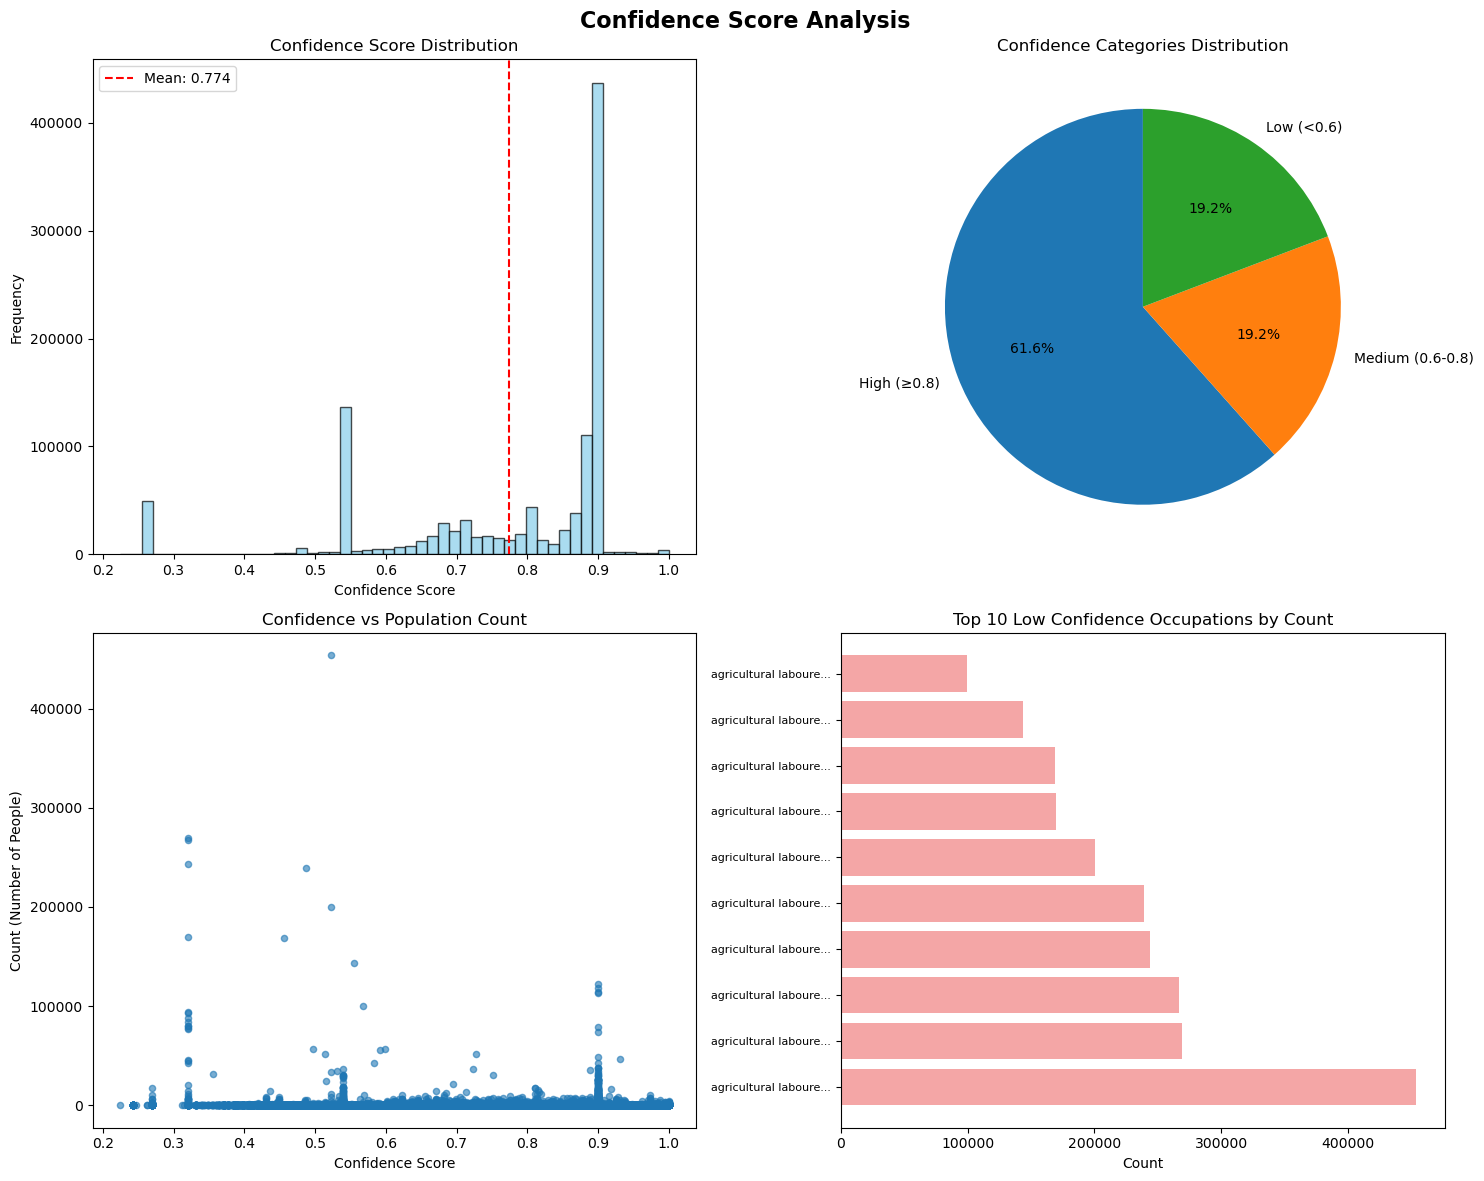

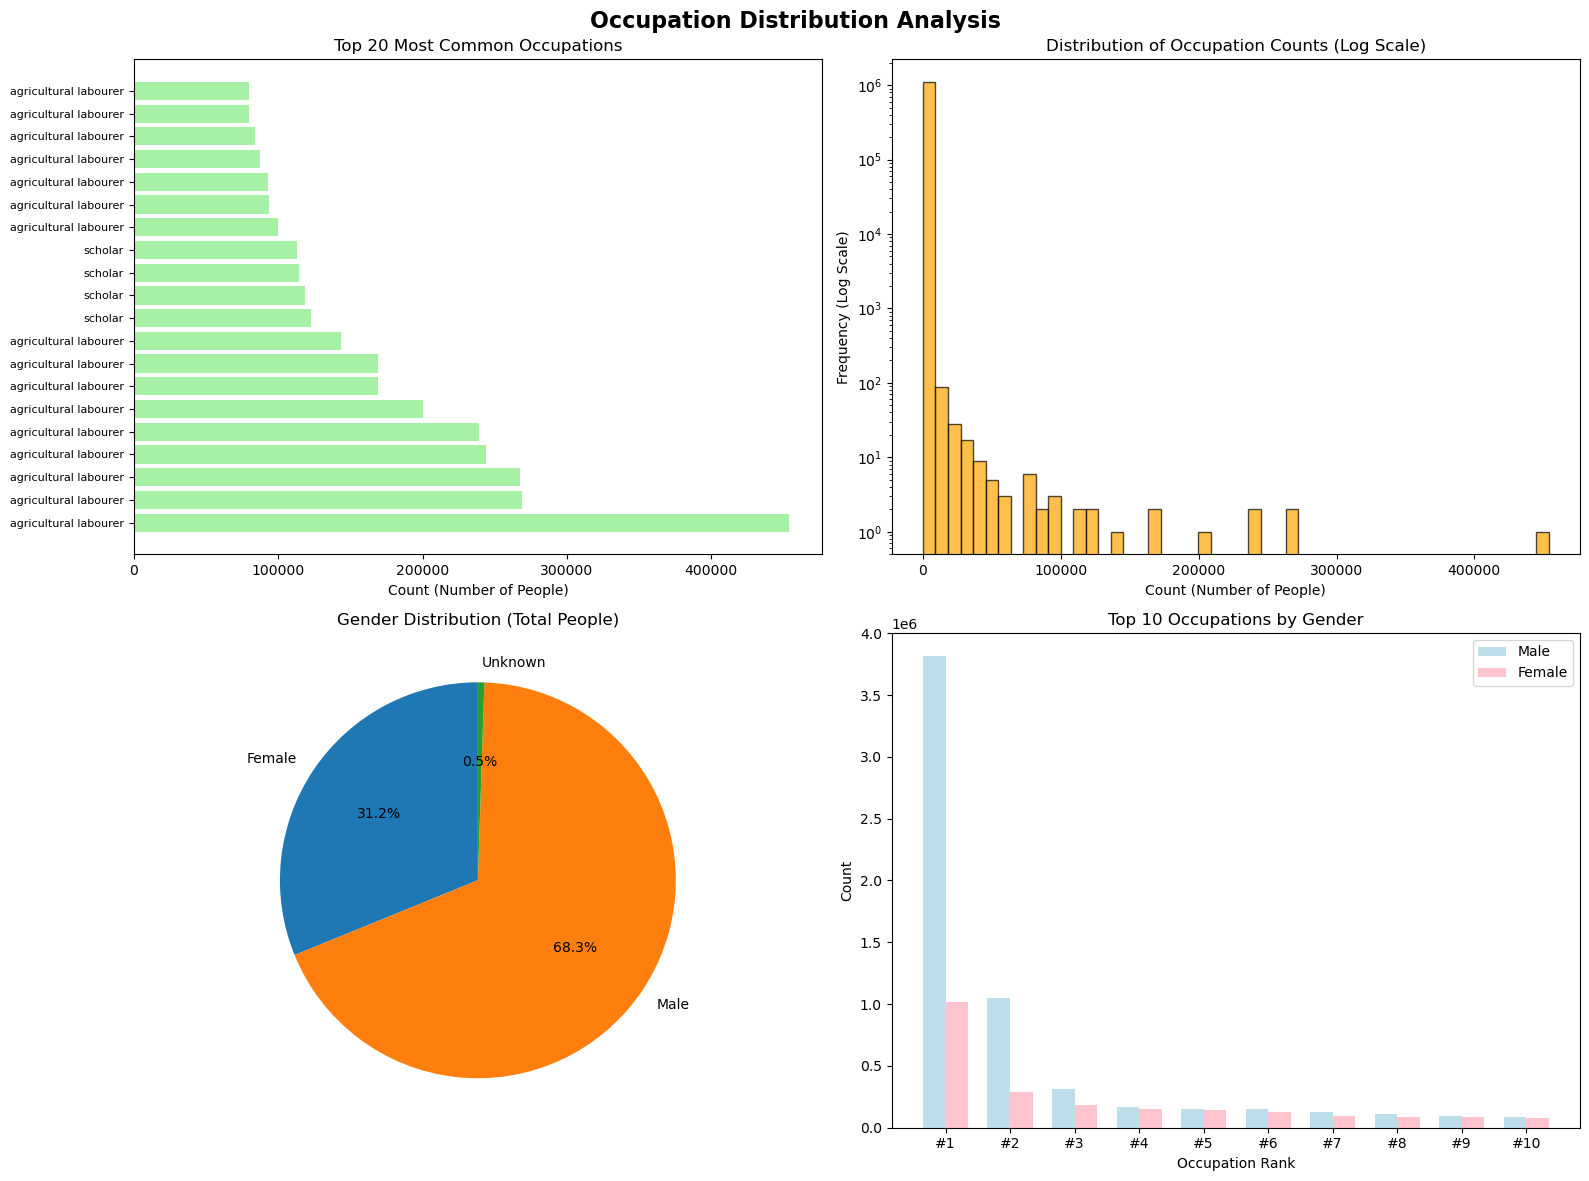

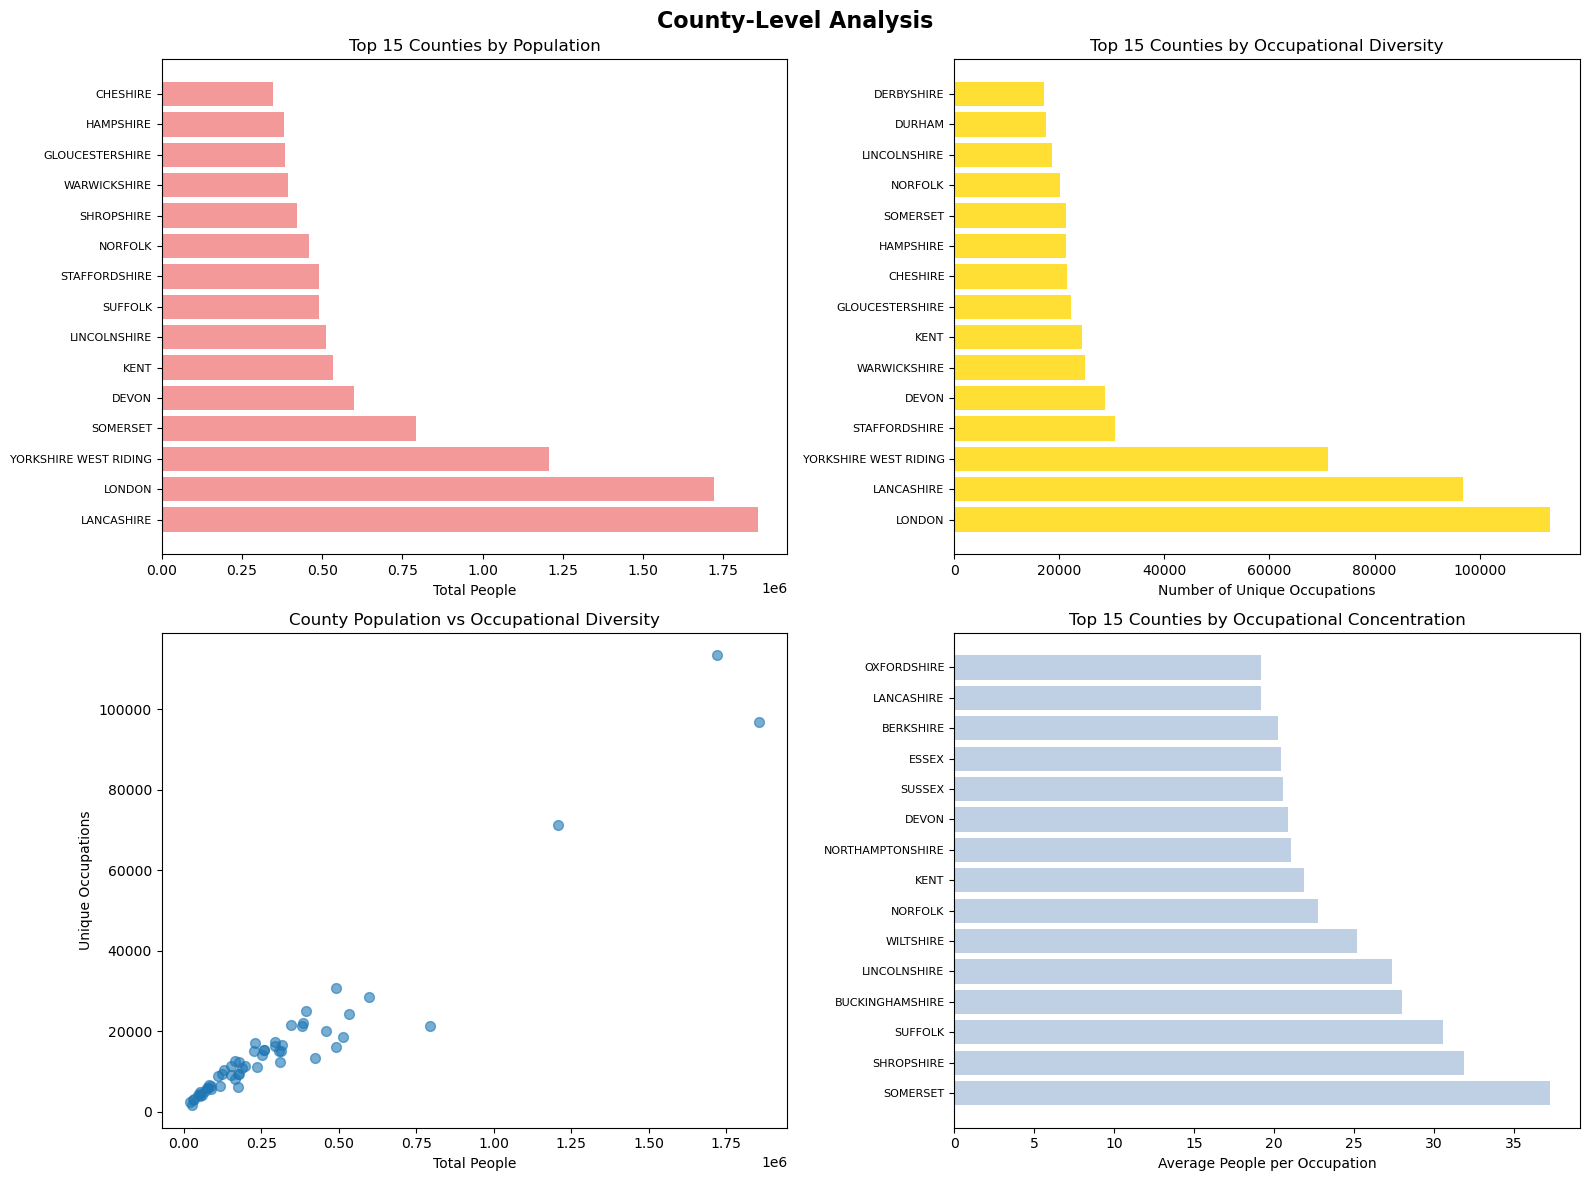

📊 Visualizations saved to: ./evaluation_results_1851

🔍 Running additional analysis...

🔍 CLEANING EFFECTIVENESS ANALYSIS
--------------------------------------------------
No processing flags found in dataset
Consider adding flags during processing to track cleaning methods

📈 QUALITY METRICS DASHBOARD

1. COMPLETENESS METRICS:
   County: 100.0% complete
   Sex: 100.0% complete
   final_result: 100.0% complete
   Count: 100.0% complete

2. CONSISTENCY METRICS:
   Standardization consistency: 51.2%
   Average occupation length: 20.1 characters
   Length range: 1 - 123 characters

3. ACCURACY PROXY METRICS:
   High confidence rate (≥0.8): 61.6%
   Population-weighted confidence: 0.708

4. COVERAGE METRICS:
   Unique occupations: 567,146
   Total people: 16,912,378
   Occupational diversity: 33.5 unique occupations per 1,000 people

5. HISTORICAL VALIDITY INDICATORS:
   ⚠️  Potential anachronisms: 76770 records
   Sample modern terms found:
     - blacksmith
     - gunsmith
     - annuit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple
import warnings
warnings.filterwarnings('ignore')

class DataProcessingEvaluator:
    """
    Comprehensive evaluation framework for historical occupation data processing pipeline
    """
    
    def __init__(self, df_aggregated: pd.DataFrame, df_original: pd.DataFrame = None):
        """
        Initialize evaluator with aggregated results and optional original data
        
        Args:
            df_aggregated: Final aggregated DataFrame
            df_original: Original raw DataFrame (optional, for comparison)
        """
        self.df_agg = df_aggregated
        self.df_orig = df_original
        self.evaluation_results = {}
        
    def run_comprehensive_evaluation(self) -> Dict:
        """
        Run all evaluation metrics and return comprehensive results
        """
        print("🔍 Starting Comprehensive Data Processing Evaluation...")
        print("=" * 60)
        
        # 1. Data Quality Assessment
        self.evaluate_data_quality()
        
        # 2. Aggregation Effect Analysis
        self.evaluate_aggregation_effects()
        
        # 3. Confidence Score Analysis
        self.evaluate_confidence_distribution()
        
        # 4. Cleaning Quality Assessment
        self.evaluate_cleaning_quality()
        
        # 5. Historical Occupation Characteristics
        self.analyze_historical_patterns()
        
        # 6. Generate Summary Report
        self.generate_summary_report()
        
        return self.evaluation_results
    
    def evaluate_data_quality(self):
        """
        Evaluate data completeness, consistency, and integrity
        """
        print("\n📊 1. DATA QUALITY ASSESSMENT")
        print("-" * 40)
        
        quality_metrics = {}
        
        # Completeness check
        total_records = len(self.df_agg)
        missing_data = {}
        
        key_columns = ['County', 'Sex', 'Occode', 'final_result', 'Count']
        for col in key_columns:
            if col in self.df_agg.columns:
                missing_count = self.df_agg[col].isna().sum()
                missing_pct = missing_count / total_records * 100
                missing_data[col] = {'count': missing_count, 'percentage': missing_pct}
                print(f"  {col}: {missing_count:,} missing ({missing_pct:.2f}%)")
        
        quality_metrics['completeness'] = missing_data
        
        # Consistency checks
        print(f"\n  📈 Total aggregated records: {total_records:,}")
        print(f"  📈 Total individuals represented: {self.df_agg['Count'].sum():,}")
        
        # Check for duplicate standardized occupations within same county/sex
        duplicates = self.df_agg.groupby(['County', 'Sex', 'final_result']).size()
        duplicate_groups = (duplicates > 1).sum()
        print(f"  ⚠️  Potential duplicate groups: {duplicate_groups}")
        
        quality_metrics['consistency'] = {
            'total_records': total_records,
            'total_individuals': int(self.df_agg['Count'].sum()),
            'duplicate_groups': duplicate_groups
        }
        
        self.evaluation_results['data_quality'] = quality_metrics
    
    def evaluate_aggregation_effects(self):
        """
        Analyze the effectiveness of occupation aggregation
        """
        print("\n🔄 2. AGGREGATION EFFECTIVENESS")
        print("-" * 40)
        
        agg_metrics = {}
        
        # Count distribution analysis
        count_stats = self.df_agg['Count'].describe()
        print(f"  📊 Count Statistics:")
        print(f"    Mean: {count_stats['mean']:.2f}")
        print(f"    Median: {count_stats['50%']:.2f}")
        print(f"    Max: {int(count_stats['max']):,}")
        print(f"    Min: {int(count_stats['min']):,}")
        
        # Identify highly aggregated occupations
        high_count_threshold = count_stats['75%']  # Top 25%
        high_count_occs = self.df_agg[self.df_agg['Count'] >= high_count_threshold]
        
        print(f"\n  🎯 Top Aggregated Occupations (Count >= {high_count_threshold:.0f}):")
        top_occupations = high_count_occs.nlargest(10, 'Count')[['final_result', 'Count', 'County']]
        for idx, row in top_occupations.iterrows():
            print(f"    {row['final_result'][:30]:<30} | {row['Count']:>6,} | {row['County']}")
        
        # County-level aggregation analysis
        county_agg = self.df_agg.groupby('County').agg({
            'Count': ['sum', 'mean', 'count'],
            'final_result': 'nunique'
        }).round(2)
        county_agg.columns = ['Total_People', 'Avg_Count', 'Num_Records', 'Unique_Occupations']
        
        print(f"\n  🏘️  County-level Summary:")
        print(f"    Counties processed: {len(county_agg)}")
        print(f"    Avg occupations per county: {county_agg['Unique_Occupations'].mean():.1f}")
        print(f"    Avg people per county: {county_agg['Total_People'].mean():.0f}")
        
        agg_metrics = {
            'count_statistics': count_stats.to_dict(),
            'high_aggregation_threshold': high_count_threshold,
            'top_occupations': top_occupations.to_dict('records'),
            'county_summary': county_agg.to_dict('index')
        }
        
        self.evaluation_results['aggregation_effects'] = agg_metrics
    
    def evaluate_confidence_distribution(self):
        """
        Analyze confidence score distribution and quality
        """
        print("\n📈 3. CONFIDENCE SCORE ANALYSIS")
        print("-" * 40)
        
        confidence_metrics = {}
        
        if 'confidence' in self.df_agg.columns:
            conf_scores = self.df_agg['confidence'].dropna()
            
            # Basic statistics
            conf_stats = conf_scores.describe()
            print(f"  📊 Confidence Statistics:")
            print(f"    Mean: {conf_stats['mean']:.3f}")
            print(f"    Median: {conf_stats['50%']:.3f}")
            print(f"    Std: {conf_stats['std']:.3f}")
            print(f"    Min: {conf_stats['min']:.3f}")
            print(f"    Max: {conf_stats['max']:.3f}")
            
            # Confidence intervals
            high_conf = (conf_scores >= 0.8).mean() * 100
            med_conf = ((conf_scores >= 0.6) & (conf_scores < 0.8)).mean() * 100
            low_conf = (conf_scores < 0.6).mean() * 100
            
            print(f"\n  🎯 Confidence Distribution:")
            print(f"    High confidence (≥0.8): {high_conf:.1f}%")
            print(f"    Medium confidence (0.6-0.8): {med_conf:.1f}%")
            print(f"    Low confidence (<0.6): {low_conf:.1f}%")
            
            # Low confidence cases analysis
            low_conf_cases = self.df_agg[self.df_agg['confidence'] < 0.6]
            if len(low_conf_cases) > 0:
                print(f"\n  ⚠️  Low Confidence Cases ({len(low_conf_cases):,} records):")
                sample_low_conf = low_conf_cases.nsmallest(5, 'confidence')[['final_result', 'confidence', 'Count']]
                for idx, row in sample_low_conf.iterrows():
                    print(f"    {row['final_result'][:30]:<30} | {row['confidence']:.3f} | Count: {row['Count']}")
            
            confidence_metrics = {
                'statistics': conf_stats.to_dict(),
                'distribution': {
                    'high_confidence_pct': high_conf,
                    'medium_confidence_pct': med_conf,
                    'low_confidence_pct': low_conf
                },
                'low_confidence_count': len(low_conf_cases)
            }
        else:
            print("  ⚠️  No confidence column found in dataset")
            confidence_metrics = {'error': 'No confidence column available'}
        
        self.evaluation_results['confidence_analysis'] = confidence_metrics
    
    def evaluate_cleaning_quality(self):
        """
        Evaluate the quality of occupation string cleaning
        """
        print("\n🧹 4. CLEANING QUALITY ASSESSMENT")
        print("-" * 40)
        
        cleaning_metrics = {}
        
        # Check for standardization patterns
        if 'Occupation_String' in self.df_agg.columns and 'final_result' in self.df_agg.columns:
            # Cases where cleaning made changes
            changed_cases = self.df_agg[
                self.df_agg['Occupation_String'].str.lower().str.strip() != 
                self.df_agg['final_result'].str.lower().str.strip()
            ]
            change_rate = len(changed_cases) / len(self.df_agg) * 100
            
            print(f"  📝 Cleaning Statistics:")
            print(f"    Records modified: {len(changed_cases):,} ({change_rate:.1f}%)")
            print(f"    Records unchanged: {len(self.df_agg) - len(changed_cases):,}")
            
            # Sample of transformations
            if len(changed_cases) > 0:
                print(f"\n  🔄 Sample Transformations:")
                sample_changes = changed_cases.head(5)[['Occupation_String', 'final_result', 'confidence']]
                for idx, row in sample_changes.iterrows():
                    orig = str(row['Occupation_String'])[:25]
                    final = str(row['final_result'])[:25]
                    conf = row.get('confidence', 'N/A')
                    print(f"    {orig:<25} → {final:<25} | Conf: {conf}")
            
            cleaning_metrics = {
                'modification_rate': change_rate,
                'changed_records': len(changed_cases),
                'unchanged_records': len(self.df_agg) - len(changed_cases)
            }
        else:
            print("  ⚠️  Original occupation strings not available for comparison")
            cleaning_metrics = {'error': 'Original occupation strings not available'}
        
        self.evaluation_results['cleaning_quality'] = cleaning_metrics
    
    def analyze_historical_patterns(self):
        """
        Analyze historical occupation patterns and characteristics
        """
        print("\n🏛️  5. HISTORICAL OCCUPATION PATTERNS")
        print("-" * 40)
        
        historical_metrics = {}
        
        # Gender distribution
        if 'Sex' in self.df_agg.columns:
            gender_dist = self.df_agg.groupby('Sex')['Count'].sum()
            print(f"  👥 Gender Distribution:")
            for gender, count in gender_dist.items():
                pct = count / gender_dist.sum() * 100
                print(f"    {gender}: {count:,} ({pct:.1f}%)")
            
            historical_metrics['gender_distribution'] = gender_dist.to_dict()
        
        # Most common occupations overall
        top_occupations = self.df_agg.groupby('final_result')['Count'].sum().nlargest(15)
        print(f"\n  🔝 Top 15 Most Common Occupations (1851):")
        for i, (occupation, count) in enumerate(top_occupations.items(), 1):
            pct = count / self.df_agg['Count'].sum() * 100
            print(f"    {i:2}. {occupation[:35]:<35} | {count:>7,} ({pct:.1f}%)")
        
        # Unique occupation diversity by county
        county_diversity = self.df_agg.groupby('County')['final_result'].nunique().sort_values(ascending=False)
        print(f"\n  🏘️  Occupational Diversity by County (Top 10):")
        for county, unique_occs in county_diversity.head(10).items():
            total_people = self.df_agg[self.df_agg['County'] == county]['Count'].sum()
            diversity_ratio = unique_occs / total_people * 1000  # per 1000 people
            print(f"    {county[:20]:<20} | {unique_occs:>4} occupations | {total_people:>6,} people | {diversity_ratio:.1f}/1k")
        
        historical_metrics.update({
            'top_occupations': top_occupations.to_dict(),
            'county_diversity': county_diversity.to_dict()
        })
        
        self.evaluation_results['historical_patterns'] = historical_metrics
    
    def generate_summary_report(self):
        """
        Generate comprehensive summary report
        """
        print("\n" + "="*60)
        print("📋 COMPREHENSIVE EVALUATION SUMMARY")
        print("="*60)
        
        # Data overview
        total_records = len(self.df_agg)
        total_people = self.df_agg['Count'].sum()
        
        print(f"\n🎯 PIPELINE PERFORMANCE OVERVIEW:")
        print(f"  • Final dataset: {total_records:,} unique occupation records")
        print(f"  • Total individuals: {total_people:,}")
        print(f"  • Average people per occupation: {total_people/total_records:.1f}")
        
        # Quality indicators
        if 'confidence_analysis' in self.evaluation_results:
            conf_data = self.evaluation_results['confidence_analysis']
            if 'distribution' in conf_data:
                high_conf_pct = conf_data['distribution']['high_confidence_pct']
                print(f"  • High confidence records: {high_conf_pct:.1f}%")
        
        if 'cleaning_quality' in self.evaluation_results:
            clean_data = self.evaluation_results['cleaning_quality']
            if 'modification_rate' in clean_data:
                mod_rate = clean_data['modification_rate']
                print(f"  • Records modified by cleaning: {mod_rate:.1f}%")
        
        # Recommendations
        print(f"\n💡 RECOMMENDATIONS:")
        
        # Based on confidence scores
        if 'confidence_analysis' in self.evaluation_results:
            conf_data = self.evaluation_results['confidence_analysis']
            if 'distribution' in conf_data:
                low_conf_pct = conf_data['distribution']['low_confidence_pct']
                if low_conf_pct > 10:
                    print(f"  • Review low confidence cases ({low_conf_pct:.1f}%) for potential improvements")
                else:
                    print(f"  • Confidence distribution is acceptable ({low_conf_pct:.1f}% low confidence)")
        
        # Based on aggregation
        if 'aggregation_effects' in self.evaluation_results:
            print(f"  • Consider geographic sub-county analysis for wage studies")
            print(f"  • Current aggregation suitable for macro-level occupational analysis")
        
        # Next steps
        print(f"\n🚀 SUGGESTED NEXT STEPS:")
        print(f"  1. Manual validation of random sample (recommended: 200-500 records)")
        print(f"  2. Export to OccCANINE for HISCO code assignment")
        print(f"  3. Cross-validate with historical occupation dictionaries")
        print(f"  4. Prepare dataset for economic analysis")
        
        # Save summary
        summary = {
            'total_records': total_records,
            'total_individuals': int(total_people),
            'avg_people_per_occupation': round(total_people/total_records, 1),
            'evaluation_timestamp': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
        }
        
        self.evaluation_results['summary'] = summary
    
    def create_sampling_plan(self, sample_size: int = 300, stratified: bool = True) -> pd.DataFrame:
        """
        Create a sampling plan for manual validation
        
        Args:
            sample_size: Number of records to sample
            stratified: Whether to use stratified sampling
        
        Returns:
            DataFrame with sampled records for manual validation
        """
        print(f"\n📝 CREATING MANUAL VALIDATION SAMPLE ({sample_size} records)")
        print("-" * 50)
        
        if stratified and 'confidence' in self.df_agg.columns:
            # Stratified sampling by confidence levels
            high_conf = self.df_agg[self.df_agg['confidence'] >= 0.8]
            med_conf = self.df_agg[(self.df_agg['confidence'] >= 0.6) & (self.df_agg['confidence'] < 0.8)]
            low_conf = self.df_agg[self.df_agg['confidence'] < 0.6]
            
            # Sample proportionally, but ensure low confidence is well represented
            high_sample = min(len(high_conf), int(sample_size * 0.5))
            med_sample = min(len(med_conf), int(sample_size * 0.3))
            low_sample = min(len(low_conf), sample_size - high_sample - med_sample)
            
            print(f"  Stratified sampling:")
            print(f"    High confidence: {high_sample} records")
            print(f"    Medium confidence: {med_sample} records") 
            print(f"    Low confidence: {low_sample} records")
            
            sample_df = pd.concat([
                high_conf.sample(n=high_sample, random_state=42) if high_sample > 0 else pd.DataFrame(),
                med_conf.sample(n=med_sample, random_state=42) if med_sample > 0 else pd.DataFrame(),
                low_conf.sample(n=low_sample, random_state=42) if low_sample > 0 else pd.DataFrame()
            ])
        else:
            # Simple random sampling
            print(f"  Simple random sampling: {sample_size} records")
            sample_df = self.df_agg.sample(n=min(sample_size, len(self.df_agg)), random_state=42)
        
        # Add validation columns
        sample_df = sample_df.copy()
        sample_df['manual_validation'] = ''
        sample_df['validation_notes'] = ''
        sample_df['validator_name'] = ''
        sample_df['validation_date'] = ''
        
        # Reorder columns for easy validation
        validation_cols = ['County', 'Sex', 'Occupation_String', 'final_result', 'confidence', 
                          'Count', 'manual_validation', 'validation_notes', 'validator_name', 'validation_date']
        
        available_cols = [col for col in validation_cols if col in sample_df.columns]
        sample_df = sample_df[available_cols]
        
        print(f"  ✅ Sample ready for validation: {len(sample_df)} records")
        
        return sample_df
    
    def save_evaluation_results(self, output_dir: str = "./evaluation_results"):
        """
        Save all evaluation results to files
        """
        import json
        import os
        
        os.makedirs(output_dir, exist_ok=True)
        
        # Save JSON summary
        json_path = os.path.join(output_dir, "evaluation_summary.json")
        with open(json_path, 'w', encoding='utf-8') as f:
            json.dump(self.evaluation_results, f, indent=2, ensure_ascii=False, default=str)
        
        print(f"\n💾 Evaluation results saved to: {output_dir}")
        print(f"   📄 Summary: {json_path}")
        
        return output_dir

def create_evaluation_visualizations(df_aggregated: pd.DataFrame, output_dir: str = "./evaluation_results"):
    """
    Create comprehensive visualizations for evaluation results
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os
    
    os.makedirs(output_dir, exist_ok=True)
    plt.style.use('default')
    
    # Set up the plotting parameters
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.rcParams['font.size'] = 10
    
    # 1. Confidence Score Distribution
    if 'confidence' in df_aggregated.columns:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Confidence Score Analysis', fontsize=16, fontweight='bold')
        
        # Histogram
        axes[0,0].hist(df_aggregated['confidence'].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0,0].set_title('Confidence Score Distribution')
        axes[0,0].set_xlabel('Confidence Score')
        axes[0,0].set_ylabel('Frequency')
        axes[0,0].axvline(df_aggregated['confidence'].mean(), color='red', linestyle='--', label=f'Mean: {df_aggregated["confidence"].mean():.3f}')
        axes[0,0].legend()
        
        # Boxplot by confidence categories
        df_temp = df_aggregated.copy()
        df_temp['conf_category'] = pd.cut(df_temp['confidence'], 
                                         bins=[0, 0.6, 0.8, 1.0], 
                                         labels=['Low (<0.6)', 'Medium (0.6-0.8)', 'High (≥0.8)'])
        
        conf_counts = df_temp['conf_category'].value_counts()
        axes[0,1].pie(conf_counts.values, labels=conf_counts.index, autopct='%1.1f%%', startangle=90)
        axes[0,1].set_title('Confidence Categories Distribution')
        
        # Confidence vs Count scatter
        axes[1,0].scatter(df_aggregated['confidence'], df_aggregated['Count'], alpha=0.6, s=20)
        axes[1,0].set_xlabel('Confidence Score')
        axes[1,0].set_ylabel('Count (Number of People)')
        axes[1,0].set_title('Confidence vs Population Count')
        
        # Low confidence examples
        low_conf = df_aggregated[df_aggregated['confidence'] < 0.6].nlargest(10, 'Count')
        if len(low_conf) > 0:
            y_pos = range(len(low_conf))
            axes[1,1].barh(y_pos, low_conf['Count'], alpha=0.7, color='lightcoral')
            axes[1,1].set_yticks(y_pos)
            axes[1,1].set_yticklabels([occ[:20] + '...' if len(occ) > 20 else occ for occ in low_conf['final_result']], fontsize=8)
            axes[1,1].set_xlabel('Count')
            axes[1,1].set_title('Top 10 Low Confidence Occupations by Count')
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, 'confidence_analysis.png'), dpi=300, bbox_inches='tight')
        plt.show()
    
    # 2. Occupation Distribution Analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Occupation Distribution Analysis', fontsize=16, fontweight='bold')
    
    # Top occupations
    top_20 = df_aggregated.nlargest(20, 'Count')
    axes[0,0].barh(range(len(top_20)), top_20['Count'], alpha=0.8, color='lightgreen')
    axes[0,0].set_yticks(range(len(top_20)))
    axes[0,0].set_yticklabels([occ[:25] + '...' if len(occ) > 25 else occ for occ in top_20['final_result']], fontsize=8)
    axes[0,0].set_xlabel('Count (Number of People)')
    axes[0,0].set_title('Top 20 Most Common Occupations')
    
    # Count distribution
    axes[0,1].hist(df_aggregated['Count'], bins=50, alpha=0.7, color='orange', edgecolor='black', log=True)
    axes[0,1].set_xlabel('Count (Number of People)')
    axes[0,1].set_ylabel('Frequency (Log Scale)')
    axes[0,1].set_title('Distribution of Occupation Counts (Log Scale)')
    
    # Gender distribution if available
    if 'Sex' in df_aggregated.columns:
        gender_counts = df_aggregated.groupby('Sex')['Count'].sum()
        axes[1,0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
        axes[1,0].set_title('Gender Distribution (Total People)')
        
        # Top occupations by gender
        top_by_gender = df_aggregated.groupby(['Sex', 'final_result'])['Count'].sum().reset_index()
        top_male = top_by_gender[top_by_gender['Sex'] == 'Male'].nlargest(10, 'Count')
        top_female = top_by_gender[top_by_gender['Sex'] == 'Female'].nlargest(10, 'Count')
        
        x = range(10)
        width = 0.35
        axes[1,1].bar([i - width/2 for i in x], top_male['Count'], width, label='Male', alpha=0.8, color='lightblue')
        axes[1,1].bar([i + width/2 for i in x], top_female['Count'], width, label='Female', alpha=0.8, color='lightpink')
        axes[1,1].set_xlabel('Occupation Rank')
        axes[1,1].set_ylabel('Count')
        axes[1,1].set_title('Top 10 Occupations by Gender')
        axes[1,1].legend()
        axes[1,1].set_xticks(x)
        axes[1,1].set_xticklabels([f'#{i+1}' for i in x])
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'occupation_distribution.png'), dpi=300, bbox_inches='tight')
    plt.show()
    
    # 3. County Analysis
    if 'County' in df_aggregated.columns:
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('County-Level Analysis', fontsize=16, fontweight='bold')
        
        # People per county
        county_people = df_aggregated.groupby('County')['Count'].sum().sort_values(ascending=False)
        top_counties = county_people.head(15)
        
        axes[0,0].barh(range(len(top_counties)), top_counties.values, alpha=0.8, color='lightcoral')
        axes[0,0].set_yticks(range(len(top_counties)))
        axes[0,0].set_yticklabels(top_counties.index, fontsize=8)
        axes[0,0].set_xlabel('Total People')
        axes[0,0].set_title('Top 15 Counties by Population')
        
        # Occupational diversity per county
        county_diversity = df_aggregated.groupby('County')['final_result'].nunique().sort_values(ascending=False)
        top_diverse = county_diversity.head(15)
        
        axes[0,1].barh(range(len(top_diverse)), top_diverse.values, alpha=0.8, color='gold')
        axes[0,1].set_yticks(range(len(top_diverse)))
        axes[0,1].set_yticklabels(top_diverse.index, fontsize=8)
        axes[0,1].set_xlabel('Number of Unique Occupations')
        axes[0,1].set_title('Top 15 Counties by Occupational Diversity')
        
        # Diversity vs Population scatter
        county_stats = df_aggregated.groupby('County').agg({
            'Count': 'sum',
            'final_result': 'nunique'
        }).rename(columns={'Count': 'Total_People', 'final_result': 'Unique_Occupations'})
        
        axes[1,0].scatter(county_stats['Total_People'], county_stats['Unique_Occupations'], alpha=0.6, s=50)
        axes[1,0].set_xlabel('Total People')
        axes[1,0].set_ylabel('Unique Occupations')
        axes[1,0].set_title('County Population vs Occupational Diversity')
        
        # Average people per occupation by county
        county_stats['Avg_People_Per_Occ'] = county_stats['Total_People'] / county_stats['Unique_Occupations']
        top_concentrated = county_stats.nlargest(15, 'Avg_People_Per_Occ')
        
        axes[1,1].barh(range(len(top_concentrated)), top_concentrated['Avg_People_Per_Occ'], alpha=0.8, color='lightsteelblue')
        axes[1,1].set_yticks(range(len(top_concentrated)))
        axes[1,1].set_yticklabels(top_concentrated.index, fontsize=8)
        axes[1,1].set_xlabel('Average People per Occupation')
        axes[1,1].set_title('Top 15 Counties by Occupational Concentration')
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, 'county_analysis.png'), dpi=300, bbox_inches='tight')
        plt.show()
    
    print(f"📊 Visualizations saved to: {output_dir}")

def analyze_cleaning_effectiveness(df_aggregated: pd.DataFrame):
    """
    Analyze the effectiveness of different cleaning methods
    """
    print("\n🔍 CLEANING EFFECTIVENESS ANALYSIS")
    print("-" * 50)
    
    analysis_results = {}
    
    # Check if we have processing flags
    processing_flags = ['is_abbreviation', 'is_misspelled', 'needs_llm_review', 'dictionary_validated']
    available_flags = [flag for flag in processing_flags if flag in df_aggregated.columns]
    
    if available_flags:
        print(f"Available processing flags: {available_flags}")
        
        for flag in available_flags:
            flag_stats = df_aggregated[flag].value_counts()
            flag_pct = flag_stats / len(df_aggregated) * 100
            
            print(f"\n{flag}:")
            for value, count in flag_stats.items():
                pct = flag_pct[value]
                print(f"  {value}: {count:,} ({pct:.1f}%)")
            
            # Confidence analysis by flag
            if 'confidence' in df_aggregated.columns:
                avg_conf_by_flag = df_aggregated.groupby(flag)['confidence'].mean()
                print(f"  Average confidence by {flag}:")
                for value, conf in avg_conf_by_flag.items():
                    print(f"    {value}: {conf:.3f}")
            
            analysis_results[flag] = {
                'distribution': flag_stats.to_dict(),
                'percentages': flag_pct.to_dict()
            }
    
    else:
        print("No processing flags found in dataset")
        print("Consider adding flags during processing to track cleaning methods")
    
    return analysis_results

def create_quality_metrics_dashboard(df_aggregated: pd.DataFrame):
    """
    Create a comprehensive quality metrics dashboard
    """
    print("\n📈 QUALITY METRICS DASHBOARD")
    print("=" * 60)
    
    metrics = {}
    
    # 1. Completeness Metrics
    print("\n1. COMPLETENESS METRICS:")
    required_fields = ['County', 'Sex', 'final_result', 'Count']
    for field in required_fields:
        if field in df_aggregated.columns:
            completeness = (1 - df_aggregated[field].isna().mean()) * 100
            metrics[f'{field}_completeness'] = completeness
            print(f"   {field}: {completeness:.1f}% complete")
    
    # 2. Consistency Metrics
    print("\n2. CONSISTENCY METRICS:")
    
    # Check for standardization consistency
    if 'final_result' in df_aggregated.columns:
        # Check for potential duplicates (case variations, extra spaces)
        normalized_occs = df_aggregated['final_result'].str.lower().str.strip()
        potential_dups = len(normalized_occs) - len(normalized_occs.unique())
        consistency_rate = (1 - potential_dups / len(df_aggregated)) * 100
        metrics['standardization_consistency'] = consistency_rate
        print(f"   Standardization consistency: {consistency_rate:.1f}%")
        
        # Length variation analysis
        length_stats = df_aggregated['final_result'].str.len().describe()
        metrics['avg_occupation_length'] = length_stats['mean']
        print(f"   Average occupation length: {length_stats['mean']:.1f} characters")
        print(f"   Length range: {length_stats['min']:.0f} - {length_stats['max']:.0f} characters")
    
    # 3. Accuracy Proxies
    print("\n3. ACCURACY PROXY METRICS:")
    
    if 'confidence' in df_aggregated.columns:
        high_conf_rate = (df_aggregated['confidence'] >= 0.8).mean() * 100
        metrics['high_confidence_rate'] = high_conf_rate
        print(f"   High confidence rate (≥0.8): {high_conf_rate:.1f}%")
        
        weighted_avg_conf = np.average(df_aggregated['confidence'], weights=df_aggregated['Count'])
        metrics['weighted_confidence'] = weighted_avg_conf
        print(f"   Population-weighted confidence: {weighted_avg_conf:.3f}")
    
    # 4. Coverage Metrics
    print("\n4. COVERAGE METRICS:")
    
    total_people = df_aggregated['Count'].sum()
    unique_occupations = df_aggregated['final_result'].nunique()
    coverage_ratio = unique_occupations / total_people * 1000
    
    metrics['occupational_diversity'] = unique_occupations
    metrics['coverage_ratio_per_1k'] = coverage_ratio
    
    print(f"   Unique occupations: {unique_occupations:,}")
    print(f"   Total people: {total_people:,}")
    print(f"   Occupational diversity: {coverage_ratio:.1f} unique occupations per 1,000 people")
    
    # 5. Historical Validity Checks
    print("\n5. HISTORICAL VALIDITY INDICATORS:")
    
    # Check for modern occupations that shouldn't exist in 1851
    modern_keywords = ['computer', 'software', 'internet', 'digital', 'cyber', 'tech', 'IT']
    modern_occs = df_aggregated[df_aggregated['final_result'].str.contains('|'.join(modern_keywords), case=False, na=False)]
    
    if len(modern_occs) > 0:
        print(f"   ⚠️  Potential anachronisms: {len(modern_occs)} records")
        print("   Sample modern terms found:")
        for occ in modern_occs['final_result'].head(5):
            print(f"     - {occ}")
    else:
        print(f"   ✅ No obvious anachronisms detected")
    
    metrics['potential_anachronisms'] = len(modern_occs)
    
    return metrics

# ===============================
# MAIN EXECUTION FUNCTIONS
# ===============================

def run_complete_evaluation(df_aggregated: pd.DataFrame, 
                          df_original: pd.DataFrame = None,
                          sample_size: int = 200,
                          output_dir: str = "./evaluation_results"):
    """
    Run complete evaluation pipeline without redundancy
    
    Args:
        df_aggregated: Final aggregated DataFrame
        df_original: Original raw DataFrame (optional)
        sample_size: Size of validation sample
        output_dir: Output directory for results
    
    Returns:
        tuple: (evaluation_results, validation_sample, output_directory)
    """
    print("🚀 STARTING COMPLETE EVALUATION PIPELINE")
    print("="*60)
    
    # 1. Initialize evaluator and run comprehensive evaluation
    evaluator = DataProcessingEvaluator(df_aggregated, df_original)
    evaluation_results = evaluator.run_comprehensive_evaluation()
    
    # 2. Create validation sample
    validation_sample = evaluator.create_sampling_plan(sample_size=sample_size, stratified=True)
    
    # 3. Save evaluation results
    output_directory = evaluator.save_evaluation_results(output_dir)
    
    # 4. Save validation sample
    import os
    sample_path = os.path.join(output_directory, "manual_validation_sample.csv")
    validation_sample.to_csv(sample_path, index=False)
    print(f"   📋 Validation sample: {sample_path}")
    
    # 5. Create visualizations
    print("\n📊 Creating visualizations...")
    create_evaluation_visualizations(df_aggregated, output_directory)
    
    # 6. Additional analysis
    print("\n🔍 Running additional analysis...")
    cleaning_analysis = analyze_cleaning_effectiveness(df_aggregated)
    quality_metrics = create_quality_metrics_dashboard(df_aggregated)
    
    # 7. Save additional results
    import json
    additional_results = {
        'cleaning_effectiveness': cleaning_analysis,
        'quality_metrics': quality_metrics
    }
    
    additional_path = os.path.join(output_directory, "additional_analysis.json")
    with open(additional_path, 'w', encoding='utf-8') as f:
        json.dump(additional_results, f, indent=2, ensure_ascii=False, default=str)
    print(f"   📄 Additional analysis: {additional_path}")
    
    print(f"\n🎉 EVALUATION COMPLETE!")
    print(f"📁 All results saved in: {output_directory}")
    print(f"📋 Manual validation sample ready: {sample_size} records")
    print(f"📊 Visualizations created")
    print(f"📈 Quality metrics computed")
    
    return evaluation_results, validation_sample, output_directory

if __name__ == "__main__":
    
    results, validation_sample, output_dir = run_complete_evaluation(
        df_aggregated=df_aggregated,
        df_original=OCCs_1851_text, 
        sample_size=200,   
        output_dir="./evaluation_results_1851" 
    )

## Multiple Occupation

In [ ]:
import pandas as pd
import numpy as np
import re
from typing import List, Dict, Tuple, Optional

class MultiOccupationProcessor:
    
    def __init__(self):
        # connection patterns
        self.connection_patterns = [
            r'\s+and\s+',           # and
            r'\s+&\s+',             # &
            r'\s+or\s+',            # or
            r'\s*,\s*',             # comma
            r'\s*/\s*',             # slash
        ]
        
        # non_occupation_terms
        self.non_occupation_terms = {
            'pauper', 'unemployed', 'invalid', 'disabled', 'retired', 
            'deceased', 'widow', 'widower', 'single', 'married',
            'at home', 'home', 'at school', 'school'
        }
        
        # modifier terms
        self.modifier_terms = {
            'former', 'ex', 'retired', 'late', 'widow of', 'wife of',
            'son of', 'daughter of', 'employing', 'employed by'
        }
    
    def split_occupation_string(self, occupation_string: str) -> List[str]:
        """Split occupation string into single occupations"""
        if pd.isna(occupation_string):
            return []
        
        text = str(occupation_string).lower().strip()
        
        # split by connection patterns
        parts = [text]
        for pattern in self.connection_patterns:
            new_parts = []
            for part in parts:
                new_parts.extend(re.split(pattern, part))
            parts = new_parts
        
        # clean parts
        cleaned_parts = []
        for part in parts:
            part = part.strip()
            if part and part not in self.non_occupation_terms:
                # remove modifier terms
                for modifier in self.modifier_terms:
                    part = re.sub(rf'\b{re.escape(modifier)}\b', '', part)
                
                part = re.sub(r'\s+', ' ', part).strip()
                
                if part and len(part) > 2:  
                    cleaned_parts.append(part)
        
        return cleaned_parts
    
    def create_single_occupation_dataset(self, df: pd.DataFrame) -> pd.DataFrame:
        """Create single occupation dataset for OccCANINE prediction"""
        print("\n🔧 CREATING SINGLE OCCUPATION DATASET")
        print("=" * 50)
        
        single_occupation_records = []
        
        for idx, row in df.iterrows():
            occupation_parts = self.split_occupation_string(row['Occupation_String'])
            
            for i, part in enumerate(occupation_parts):
                single_record = {
                    'original_index': idx,
                    'original_occupation_string': row['Occupation_String'],
                    'split_index': i,
                    'single_occupation': part,
                    'County': row.get('County', ''),
                    'Sex': row.get('Sex', ''),
                    'Year': row.get('Year', ''),
                    'Count': row.get('Count', 1),
                    'original_hisco': row.get('HISCO_y', ''),
                    'category': row.get('category', ''),
                    'confidence': row.get('confidence', 0)
                }
                single_occupation_records.append(single_record)
        
        single_df = pd.DataFrame(single_occupation_records)
        
        print(f"📊 Single occupation dataset created:")
        print(f"   Original multi-occupation records: {len(df):,}")
        print(f"   Total single occupations extracted: {len(single_df):,}")
        print(f"   Average occupations per record: {len(single_df)/len(df):.1f}")
        
        # Show sample splitting results
        print(f"\n🔍 Sample splitting results:")
        sample_original = df.head(3)
        for i, (_, row) in enumerate(sample_original.iterrows(), 1):
            original_idx = row.name
            splits = single_df[single_df['original_index'] == original_idx]['single_occupation'].tolist()
            print(f"   {i}. '{row['Occupation_String']}'")
            print(f"      → {splits}")
        
        return single_df
    
    def prepare_for_occanine(self, single_df: pd.DataFrame, 
                           enhanced_input: bool = True) -> pd.DataFrame:
        """Prepare input data for OccCANINE prediction"""
        print("\n📝 PREPARING FOR OCCANINE PREDICTION")
        print("=" * 50)
        
        def create_input_string(row):
            """Create OccCANINE input string"""
            if enhanced_input:
                # Enhanced format: Sex + Occupation + in + County
                sex = str(row['Sex']).title() if pd.notna(row['Sex']) else ""
                occupation = str(row['single_occupation']).lower()
                county = str(row['County']).title() if pd.notna(row['County']) else ""
                
                parts = []
                if sex:
                    parts.append(sex)
                if occupation:
                    parts.append(occupation)
                
                base_string = " ".join(parts)
                
                if county:
                    return f"{base_string} in {county}"
                else:
                    return base_string
            else:
                # Basic format: occupation only
                return str(row['single_occupation']).lower()
        
        # Create input strings
        single_df['occanine_input'] = single_df.apply(create_input_string, axis=1)
        
        # Create CSV file for OccCANINE
        occanine_input = pd.DataFrame({
            'record_id': range(len(single_df)),
            'original_index': single_df['original_index'],
            'split_index': single_df['split_index'],
            'input_text': single_df['occanine_input'],
            'original_occupation': single_df['single_occupation'],
            'county': single_df['County'],
            'sex': single_df['Sex']
        })
        
        print(f"✅ OccCANINE input prepared:")
        print(f"   Records for prediction: {len(occanine_input):,}")
        print(f"   Enhanced input format: {enhanced_input}")
        
        # Show sample inputs
        print(f"\n📋 Sample inputs for OccCANINE:")
        for i, (_, row) in enumerate(occanine_input.head(3).iterrows(), 1):
            print(f"   {i}. {row['input_text']}")
        
        return occanine_input

    def merge_predictions_back(self, original_df: pd.DataFrame, 
                             single_predictions: pd.DataFrame) -> pd.DataFrame:
        """Merge single occupation prediction results back to original data"""
        print("\n🔄 MERGING PREDICTIONS BACK TO ORIGINAL DATA")
        print("=" * 50)
        
        # Add new columns to original data
        result_df = original_df.copy()
        result_df['all_predicted_hisco'] = None
        result_df['prediction_count'] = 0
        
        # Group prediction results by original index
        prediction_groups = single_predictions.groupby('original_index')
        
        processed_count = 0
        
        for original_idx, group in prediction_groups:
            if original_idx not in result_df.index:
                continue
            
            # Filter valid predictions (only need predicted_hisco not null)
            valid_predictions = group[
                group['predicted_hisco'].notna()
            ].copy()
            
            if len(valid_predictions) == 0:
                result_df.loc[original_idx, 'all_predicted_hisco'] = 'no_valid_predictions'
                result_df.loc[original_idx, 'prediction_count'] = 0
                continue
            
            # Collect all prediction results
            all_hisco_codes = []
            all_predictions_detail = []
            
            for _, pred_row in valid_predictions.iterrows():
                hisco_code = pred_row['predicted_hisco']
                all_hisco_codes.append(str(hisco_code))
                
                # Save detailed information (including original occupation name if available)
                detail = {
                    'hisco': hisco_code,
                    'split_index': pred_row.get('split_index', ''),
                    'occupation': pred_row.get('original_occupation', '')
                }
                all_predictions_detail.append(detail)
            
            # Concatenate all HISCO codes into string (semicolon separated)
            result_df.loc[original_idx, 'all_predicted_hisco'] = '; '.join(all_hisco_codes)
            result_df.loc[original_idx, 'prediction_count'] = len(all_hisco_codes)
            result_df.loc[original_idx, 'prediction_details'] = str(all_predictions_detail)
            
            processed_count += 1
        
        print(f"📊 Merging results:")
        print(f"   Original multi-occupation records: {len(prediction_groups)}")
        print(f"   Successfully processed: {processed_count}")
        
        # Statistics of merging results
        successful_merges = result_df['all_predicted_hisco'].notna().sum()
        records_with_predictions = (result_df['all_predicted_hisco'] != 'no_valid_predictions').sum()
        print(f"   Records with merged predictions: {records_with_predictions}")
        
        # Statistics of prediction count distribution
        prediction_counts = result_df['prediction_count'].value_counts().sort_index()
        print(f"\n📈 Prediction count distribution:")
        for count, freq in prediction_counts.head(10).items():
            print(f"   {count} predictions: {freq} records")
        
        if processed_count > 0:
            print(f"\n📋 Sample merged results:")
            sample_merged = result_df[
                (result_df['all_predicted_hisco'].notna()) & 
                (result_df['all_predicted_hisco'] != 'no_valid_predictions')
            ].head(3)
            
            for i, (_, row) in enumerate(sample_merged.iterrows(), 1):
                print(f"   {i}. '{row['Occupation_String']}'")
                print(f"      → All HISCO codes: {row['all_predicted_hisco']}")
                print(f"      → Total predictions: {row['prediction_count']}")
        
        return result_df
    
def process_multi_occupations_complete_workflow(df: pd.DataFrame,
                                              output_dir: str = "./cleaning_results_1851",
                                              enhanced_input: bool = True,
                                              ) -> Tuple[pd.DataFrame, pd.DataFrame, Dict]:
    """
    Complete multi-occupation processing workflow
    
    Args:
        df: Original data DataFrame
        output_dir: Output directory
        enhanced_input: Whether to use enhanced input format
    
    Returns:
        tuple: (merged data, single occupation prediction data, evaluation results)
    """
    
    import os
    os.makedirs(output_dir, exist_ok=True)
    
    print("🚀 COMPLETE MULTI-OCCUPATION PROCESSING WORKFLOW")
    print("="*60)
    
    # Initialize processor
    processor = MultiOccupationProcessor()
    
    # Create single occupation dataset
    single_occupation_df = processor.create_single_occupation_dataset(df)
    
    # Step 3: Prepare OccCANINE input
    occanine_input_df = processor.prepare_for_occanine(single_occupation_df, enhanced_input)
    
    # Save OccCANINE input file
    input_file_path = os.path.join(output_dir, "multi2single_occupations_for_occanine.csv")
    occanine_input_df.to_csv(input_file_path, index=False)
    
    return occanine_input_df, {}

def merge_occanine_predictions(original_df: pd.DataFrame,
                             prediction_file: str,
                             ) -> Tuple[pd.DataFrame, Dict]:
    """
    Merge OccCANINE prediction results to original data
    
    Args:
        original_df: Original data (multi-occupation identified)
        prediction_file: OccCANINE prediction result file path
    
    Returns:
        tuple: (merged data, evaluation results)
    """
    print("🔄 MERGING OCCANINE PREDICTIONS")
    print("=" * 40)
    
    # Load prediction results
    try:
        predictions_df = pd.read_csv(prediction_file)
        print(f"✅ Loaded predictions from: {prediction_file}")
        print(f"   Prediction records: {len(predictions_df):,}")
    except Exception as e:
        print(f"❌ Error loading predictions: {e}")
        return original_df, {}
    
    # Initialize processor
    processor = MultiOccupationProcessor()
    
    # Merge prediction results
    merged_df = processor.merge_predictions_back(original_df, predictions_df)
    
    return merged_df


if __name__ == "__main__":

    df = pd.read_csv("D:\\Postgraduate\\Data Science Project\\Code\\cleaning_results_1851\\multi_occupation_flagged.csv",header=0)

    single_occs, _ = process_multi_occupations_complete_workflow(df)
    
    single_occs_array = single_occs['input_text']
    from histocc import OccCANINE

    model = OccCANINE()
    model.verbose = True
    x = model.predict(
        single_occs_array,
        get_dict = True,
        lang = "en"
    )
    
    single_occs['predicted_hisco'] = x

    single_occs.to_csv(".\\cleaning_results_1851\\multi_OccCANINE_predictions.csv",index=False)

    merged_df = merge_occanine_predictions(original_df=df,
                                                       prediction_file='./cleaning_results_1851/multi_OccCANINE_predictions.csv')
    merged_df.to_csv("D:\\Postgraduate\\Data Science Project\\Code\\cleaning_results_1851\\Step6 multi_OccCANINE_result.csv",index=False)

## Create InputText with context

In [1]:
import pandas as pd
import numpy as np
import os

def create_enhanced_input_strings(df: pd.DataFrame) -> pd.Series:
    """
    Create enhanced input strings in format: "Sex final_result in County"
    
    Args:
        df: DataFrame with columns: Sex, final_result, Occode_Desc, County
    
    Returns:
        pd.Series: Enhanced input strings
    """
    
    print(f" CREATING ENHANCED INPUT STRINGS")
    print("=" * 50)
    print("Format: 'Sex final_result in County'")
    
    def format_enhanced_string(row):
        """
        Create enhanced string: "Sex final_result in County"
        Example: "Male agricultural labourer (AGRICULTURAL LABOURER, FARM SERVANT) in ANGLESEY"
        """
        try:
            # Get components
            sex = str(row['Sex']).title() if pd.notna(row['Sex']) else ""
            occupation = str(row['final_result']).lower() if pd.notna(row['final_result']) else ""
            county = str(row['County']).title() if pd.notna(row['County']) else ""

            
            # Build the enhanced string
            result_parts = []
            
            # Add sex
            if sex:
                result_parts.append(sex)
            
            result_parts.append(f"{occupation}")

            # Join parts so far
            base_string = " ".join(result_parts)
            
            # Add location with "in"
            if county:
                if base_string:
                    return f"{base_string} in {county}"
                else:
                    return f"in {county}"
            else:
                return base_string
                
        except Exception as e:
            print(f"Error formatting row: {e}")
            # Fallback to original occupation
            return str(row.get('final_result', ''))
    
    # Apply formatting to all rows
    enhanced_strings = df.apply(format_enhanced_string, axis=1)
    
    # Print statistics
    print(f"\n Enhancement Statistics:")
    print(f"   Total strings created: {len(enhanced_strings):,}")
    print(f"   Average length: {enhanced_strings.str.len().mean():.1f} characters")
    print(f"   Max length: {enhanced_strings.str.len().max()} characters")
    print(f"   Min length: {enhanced_strings.str.len().min()} characters")
    
    # Count how many strings have each component
    has_sex = enhanced_strings.str.contains(r'^(Male|Female)', case=False, na=False).sum()
    has_description = enhanced_strings.str.contains(r'\([^)]+\)', na=False).sum()
    has_location = enhanced_strings.str.contains(r' in \w+', case=False, na=False).sum()
    
    print(f"\n Component Coverage:")
    print(f"   With gender: {has_sex:,} ({has_sex/len(enhanced_strings)*100:.1f}%)")
    print(f"   With description: {has_description:,} ({has_description/len(enhanced_strings)*100:.1f}%)")
    print(f"   With location: {has_location:,} ({has_location/len(enhanced_strings)*100:.1f}%)")
    
    # Show sample results
    print(f"\n Sample Enhanced Strings:")
    for i in range(min(5, len(enhanced_strings))):
        original = df.iloc[i]['final_result'] if 'final_result' in df.columns else 'N/A'
        enhanced = enhanced_strings.iloc[i]
        print(f"   {i+1}. Original: {original}")
        print(f"      Enhanced: {enhanced}")
        print()
    
    return enhanced_strings

def save_enhanced_inputs_for_occanine(df: pd.DataFrame, 
                                    enhanced_strings: pd.Series,
                                    output_dir: str = "./enhanced_inputs") -> str:
    """
    Save enhanced input strings for OccCANINE testing
    
    Args:
        df: Original DataFrame
        enhanced_strings: Enhanced input strings
        output_dir: Output directory
    
    Returns:
        str: Path to saved file
    """
    
    os.makedirs(output_dir, exist_ok=True)
    
    print(f"\n SAVING ENHANCED INPUTS FOR OCCANINE")
    print("=" * 50)
    
    # Create output DataFrame for OccCANINE
    occanine_input = pd.DataFrame({
        'record_id': range(len(df)),
        'original_hisco': df.get('HISCO_x', ''),
        'enhanced_input': enhanced_strings,
        'original_occupation': df.get('final_result', ''),
        'sex': df.get('Sex', ''),
        'county': df.get('County', ''),
        'count': df.get('Count', 1)
    })
    
    # Save enhanced input file
    enhanced_file_path = os.path.join(output_dir, "enhanced_input_for_occanine.csv")
    occanine_input.to_csv(enhanced_file_path, index=False)
    
    print(f" Enhanced inputs saved: {enhanced_file_path}")
    print(f"    Records: {len(occanine_input):,}")
    print(f"    Ready for OccCANINE processing")
    
    # Also save just the enhanced strings array (like your original final_result_array)
    enhanced_array_path = os.path.join(output_dir, "enhanced_input_array.npy")
    np.save(enhanced_array_path, enhanced_strings.to_numpy())
    
    print(f" Enhanced array saved: {enhanced_array_path}")
    print(f"    Array shape: {enhanced_strings.to_numpy().shape}")
    print(f"    Load with: np.load('{enhanced_array_path}')")
    
    # Create comparison file showing before/after
    comparison_df = pd.DataFrame({
        'original_final_result': df.get('final_result', ''),
        'enhanced_input': enhanced_strings,
        'sex': df.get('Sex', ''),
        'county': df.get('County', ''),
    })
    
    comparison_path = os.path.join(output_dir, "before_after_comparison.csv")
    comparison_df.to_csv(comparison_path, index=False)
    
    print(f" Comparison file saved: {comparison_path}")
    
    return enhanced_file_path

def analyze_enhancement_impact(df: pd.DataFrame, enhanced_strings: pd.Series):
    """
    Analyze the impact of the enhancement on input strings
    """
    
    print(f"\n ENHANCEMENT IMPACT ANALYSIS")
    print("=" * 40)
    
    original_strings = df['final_result'].astype(str)
    
    # Length comparison
    orig_avg_length = original_strings.str.len().mean()
    enhanced_avg_length = enhanced_strings.str.len().mean()
    length_increase = enhanced_avg_length - orig_avg_length
    
    print(f"   Length Analysis:")
    print(f"   Original average length: {orig_avg_length:.1f} characters")
    print(f"   Enhanced average length: {enhanced_avg_length:.1f} characters")
    print(f"   Average increase: {length_increase:.1f} characters ({length_increase/orig_avg_length*100:.1f}%)")
    
    # Information density analysis
    print(f"\n Information Density:")
    
    # Count unique information elements
    unique_occupations = df['final_result'].nunique()
    unique_sexes = df['Sex'].nunique() if 'Sex' in df.columns else 0
    unique_counties = df['County'].nunique() if 'County' in df.columns else 0
    unique_descriptions = df['Occode_Desc'].nunique() if 'Occode_Desc' in df.columns else 0
    
    print(f"   Unique occupations: {unique_occupations:,}")
    print(f"   Unique genders: {unique_sexes}")
    print(f"   Unique counties: {unique_counties}")
    print(f"   Unique descriptions: {unique_descriptions:,}")
    
    # Context richness score
    context_elements_per_record = 1  # Always have occupation
    if 'Sex' in df.columns:
        context_elements_per_record += (df['Sex'].notna()).mean()
    if 'County' in df.columns:
        context_elements_per_record += (df['County'].notna()).mean()
    if 'Occode_Desc' in df.columns:
        context_elements_per_record += (df['Occode_Desc'].notna()).mean()
    
    print(f"   Average context elements per record: {context_elements_per_record:.2f}")
    
    # Estimate improvement potential
    print(f"\n Expected HISCO Prediction Improvement:")
    
    if context_elements_per_record >= 3.5:
        expected_improvement = "20-30%"
        confidence = "High"
    elif context_elements_per_record >= 3.0:
        expected_improvement = "15-25%"
        confidence = "High"
    elif context_elements_per_record >= 2.5:
        expected_improvement = "10-18%"
        confidence = "Medium-High"
    elif context_elements_per_record >= 2.0:
        expected_improvement = "5-12%"
        confidence = "Medium"
    else:
        expected_improvement = "2-8%"
        confidence = "Low-Medium"
    
    print(f"   Expected accuracy improvement: {expected_improvement}")
    print(f"   Confidence level: {confidence}")
    
    # Show most informative examples
    print(f"\n Most Information-Rich Examples:")
    # Find records with all components
    complete_records = df[
        df['Sex'].notna() & 
        df['County'].notna() & 
        df['Occode_Desc'].notna() &
        df['final_result'].notna()
    ]
    
    if len(complete_records) > 0:
        for i in range(min(3, len(complete_records))):
            idx = complete_records.index[i]
            print(f"   {i+1}. {enhanced_strings.iloc[idx]}")
    
    return {
        'original_avg_length': orig_avg_length,
        'enhanced_avg_length': enhanced_avg_length,
        'length_increase_pct': length_increase/orig_avg_length*100,
        'context_elements': context_elements_per_record,
        'expected_improvement': expected_improvement,
        'confidence': confidence
    }

def enhance_occupation_inputs(df_predict: pd.DataFrame, 
                            output_dir: str = "./enhanced_inputs") -> pd.Series:
    """
    Main function to create enhanced input strings for OccCANINE
    Format: "Sex final_result (Occode_Desc) in County"
    
    Args:
        df_predict: DataFrame with your aggregated occupation data
        output_dir: Directory to save output files
    
    Returns:
        pd.Series: Enhanced input strings (equivalent to your final_result_array)
    """
    
    print(" ENHANCING OCCUPATION INPUTS FOR OCCANINE")
    print("="*60)
    
    # Validate required columns
    required_cols = ['final_result']
    missing_cols = [col for col in required_cols if col not in df_predict.columns]
    
    if missing_cols:
        raise ValueError(f"Missing required columns: {missing_cols}")
    
    # Check optional columns
    optional_cols = ['Sex', 'County', 'HISCO_x']
    available_cols = [col for col in optional_cols if col in df_predict.columns]
    
    print(f" Required columns found: {required_cols}")
    print(f" Available optional columns: {available_cols}")
    
    if not available_cols:
        print("  Warning: No optional columns found. Enhancement will be limited.")
    
    # Create enhanced input strings
    enhanced_strings = create_enhanced_input_strings(df_predict)
    
    # Analyze enhancement impact
    impact_analysis = analyze_enhancement_impact(df_predict, enhanced_strings)
    
    # Save for OccCANINE
    output_file = save_enhanced_inputs_for_occanine(df_predict, enhanced_strings, output_dir)
    
    print(f"\n ENHANCEMENT COMPLETE!")
    print(f" Files saved in: {output_dir}")
    print(f" Ready for OccCANINE testing")
    print(f" Expected improvement: {impact_analysis['expected_improvement']}")
    
    # Return the enhanced strings array (like your original final_result_array)
    return enhanced_strings

if __name__ == "__main__":

    df_predict = pd.read_csv(".\\cleaning_results_1851\\Step4 aggregated_occupations.csv", header=0)
    enhanced_input_array = enhance_occupation_inputs(df_predict)

 ENHANCING OCCUPATION INPUTS FOR OCCANINE
 Required columns found: ['final_result']
 Available optional columns: ['Sex', 'County', 'HISCO_x']
 CREATING ENHANCED INPUT STRINGS
Format: 'Sex final_result in County'

 Enhancement Statistics:
   Total strings created: 1,108,352
   Average length: 40.8 characters
   Max length: 138 characters
   Min length: 14 characters


C:\Users\51591\AppData\Local\Temp\ipykernel_58172\1772136010.py:69: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  has_sex = enhanced_strings.str.contains(r'^(Male|Female)', case=False, na=False).sum()



 Component Coverage:
   With gender: 1,084,305 (97.8%)
   With description: 0 (0.0%)
   With location: 1,108,352 (100.0%)

 Sample Enhanced Strings:
   1. Original: agricultural labourer
      Enhanced: Male agricultural labourer in Anglesey

   2. Original: scholar
      Enhanced: Male scholar in Anglesey

   3. Original: scholar
      Enhanced: Female scholar in Anglesey

   4. Original: house servant
      Enhanced: Female house servant in Anglesey

   5. Original: domestic servant
      Enhanced: Female domestic servant in Anglesey


 ENHANCEMENT IMPACT ANALYSIS
   Length Analysis:
   Original average length: 20.1 characters
   Enhanced average length: 40.8 characters
   Average increase: 20.7 characters (102.9%)

 Information Density:
   Unique occupations: 567,146
   Unique genders: 3
   Unique counties: 56
   Unique descriptions: 780
   Average context elements per record: 3.99

 Expected HISCO Prediction Improvement:
   Expected accuracy improvement: 20-30%
   Confidence level

## OccCANINE predict HISCO without Fine-tune

In [1]:
from histocc import OccCANINE

model = OccCANINE()

d:\Anaconda\envs\hisco\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\Anaconda\envs\hisco\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] 找不到指定的程序。'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
import numpy as np

enhanced_input_array = np.load("D:\\Postgraduate\\Data Science Project\\Code\\enhanced_inputs\\enhanced_input_array.npy",allow_pickle=True)

model.verbose = True
x = model.predict(
    enhanced_input_array,
    get_dict = True,
    lang = "en"
)

Processed batch 4330 out of 4330 batchesProduced HISCO codes for 1108352 observations in 0 hours, 24 minutes and 0.793 seconds.
Estimated hours saved compared to human labeller (assuming 10 seconds per label):
 ---> 3078 hours, 21 minutes and 19 seconds


In [4]:
import pandas as pd
df_predict = pd.read_csv(".\\cleaning_results_1851\\Step4 aggregated_occupations.csv", header=0)
df_predict["OccCANINE_Check"] = x
df_predict.to_csv(".\\cleaning_results_1851\\Step5 OccCANINE_result.csv",index=False)

get 100 results from res_1851, 53 True predictions and 47 wrong predictions(include 5 NaN predictions)

## OccCANINE predict HISCO with Fine-tune

In [41]:
import pandas as pd

df_fine_tune = pd.read_csv("fine_tune.csv")
label_cols = ["hisco"]

df_fine_tune["lang"] = "en"

In [42]:
model.finetune(
    df_fine_tune,
    label_cols,
    batch_size=4,
    save_name = "finetune_model",
    verbose_extra= True
)

==== Started finetuning procedure ====
1439 observations will be used in training.
160 observations will be used in validation.
Saved tmp files to Data/Tmp_finetune
----------
Intital performance:
Validation acc: 0.71875; Validation loss: 0.0008943231823650422
----------
Epoch 1/3
Batch 360/360 - Loss: 0.0004, Acc: 0.6667, ETA: 0m0s of 0m33ss
Epoch completed.
Train loss 0.0009262670508986856, accuracy 0.6358796296296296
Val loss 0.0006093400467307219, accuracy 0.7875
Validation loss improved. Saved improved model
----------
Epoch 2/3
Batch 360/360 - Loss: 0.0001, Acc: 1.0000, ETA: 0m0s of 0m33ss
Epoch completed.
Train loss 0.0006166176500351462, accuracy 0.7194444444444444
Val loss 0.0005363313196994568, accuracy 0.8
Validation loss improved. Saved improved model
----------
Epoch 3/3
Batch 360/360 - Loss: 0.0011, Acc: 0.6667, ETA: 0m0s of 0m32ss
Epoch completed.
Train loss 0.0004724652739595412, accuracy 0.7740740740740741
Val loss 0.0005098964650187554, accuracy 0.7875
Validation loss

In [43]:
import numpy as np
model_new = OccCANINE("Finetuned/finetune_model",hf = False)
enhanced_input_array = np.load("D:\\Postgraduate\\Data Science Project\\Code\\cleaning_results_1861\\enhanced_input_array.npy",allow_pickle=True)

model_new.verbose = True
x = model_new.predict(
    enhanced_input_array,
    get_dict = True,
    lang = "en"
)

df_predict = pd.read_csv(".\\cleaning_results_1861\\aggregated_occupations.csv", header=0)
df_predict["OccCANINE_finetune"] = x
df_predict.to_csv(".\\cleaning_results_1861\\OccCANINE_finetune_result.csv",index=False)

Processed batch 4 out of 4 batchesProduced HISCO codes for 999 observations in 0 hours, 0 minutes and 2.030 seconds.
Estimated hours saved compared to human labeller (assuming 10 seconds per label):
 ---> 2 hours, 46 minutes and 28 seconds


In [40]:
df_predict["OccCANINE_finetune"]

0                   [[61110, 0.9995894, General Farmer]]
1      [[71105, 0.246775, Miner, General], [71110, 0....
2      [[98290, 0.45541155, Other Ship's EngineRoom R...
3                   [[61110, 0.9999647, General Farmer]]
4                                                     []
                             ...                        
994      [[45130, 0.37795037, Retail Trade Salesperson]]
995                                                   []
996              [[77310, 0.53660035, Butcher, General]]
997         [[75190, 0.92037684, Other Fibre Preparers]]
998                                                   []
Name: OccCANINE_finetune, Length: 999, dtype: object